## LearnPlatform COVID-19 Impact on Digital Learning

### 1. Data Preprocessing

In [6]:
#import libraries 
import os
import pandas as pd
import numpy as np
import glob

import seaborn as sns
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker


print('setup complete')


setup complete


#### 1.1 Districts Dataset Overview

The district file includes the following information: 

- **district_id**: The unique identifier of the school district

- **state**: The state where the district resides in

- **locale**: NCES locale classification that categorizes U.S. territory into four types of areas: City, Suburban, Town, and Rural.

- **pct_black/hispanic**: Percentage of students in the districts identified as Black or Hispanic based on 2018-19 NCES data

- **pct_free/reduced**: Percentage of students in the districts eligible for free or reduced-price lunch based on 2018-19 NCES data

- **county_connection_ratio**: `ratio` (residential fixed high-speed connections over 200 kbps in at least one direction/households) based on the county level data from FCC From 477 

- **pp_total_raw**: Per-pupil total expenditure (sum of local and federal expenditure) from Edunomics Lab's National Education Resource Database on Schools (NERD$) project. The expenditure data are school-by-school, and the median value was used to represent the expenditure of a given school district.

In [7]:
#load data
path= 'C://Users/think/Documents/Project/COVID-19 Impact on Digital Learning'
os.chdir(path)
districts= pd.read_csv(path+'/districts_info.csv')
districts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   district_id               233 non-null    int64 
 1   state                     176 non-null    object
 2   locale                    176 non-null    object
 3   pct_black/hispanic        176 non-null    object
 4   pct_free/reduced          148 non-null    object
 5   county_connections_ratio  162 non-null    object
 6   pp_total_raw              118 non-null    object
dtypes: int64(1), object(6)
memory usage: 12.9+ KB


In [8]:
districts.head()

district_id     state  locale pct_black/hispanic pct_free/reduced  \
0         8815  Illinois  Suburb           [0, 0.2[         [0, 0.2[   
1         2685       NaN     NaN                NaN              NaN   
2         4921      Utah  Suburb           [0, 0.2[       [0.2, 0.4[   
3         3188       NaN     NaN                NaN              NaN   
4         2238       NaN     NaN                NaN              NaN   

  county_connections_ratio    pp_total_raw  
0                [0.18, 1[  [14000, 16000[  
1                      NaN             NaN  
2                [0.18, 1[    [6000, 8000[  
3                      NaN             NaN  
4                      NaN             NaN

The district dataset has 233 rows and 7 columns, with 422 missing values contributed by the following variables:

In [9]:
print('Total of {} missing values:'.format(sum(districts.isnull().sum())))
print(districts.isnull().sum())

Total of 442 missing values:
district_id                   0
state                        57
locale                       57
pct_black/hispanic           57
pct_free/reduced             85
county_connections_ratio     71
pp_total_raw                115
dtype: int64


Unique values of pct_black/hispanic, pct_free/reduced, county_connections_ratio and pp_total_raw variables:

In [10]:
# check unique values in pct_blck/hispanic, pct_free/reduced, county_connections_ratio and pp_total_raw columns
def unique_values(df, col):
    v_c= df[c].value_counts()
    print(v_c, ', {} unique values'.format(df[c].nunique()))

for c in ['pct_black/hispanic', 'pct_free/reduced', 'county_connections_ratio', 'pp_total_raw']:
    unique_values(districts, c)


[0, 0.2[      116
[0.2, 0.4[     24
[0.4, 0.6[     17
[0.6, 0.8[     11
[0.8, 1[        8
Name: pct_black/hispanic, dtype: int64 , 5 unique values
[0.2, 0.4[    48
[0, 0.2[      46
[0.4, 0.6[    37
[0.6, 0.8[    13
[0.8, 1[       4
Name: pct_free/reduced, dtype: int64 , 5 unique values
[0.18, 1[    161
[1, 2[         1
Name: county_connections_ratio, dtype: int64 , 2 unique values
[8000, 10000[     30
[10000, 12000[    17
[12000, 14000[    15
[14000, 16000[    15
[6000, 8000[      13
[16000, 18000[    13
[18000, 20000[     8
[4000, 6000[       2
[22000, 24000[     2
[20000, 22000[     2
[32000, 34000[     1
Name: pp_total_raw, dtype: int64 , 11 unique values


In [11]:
#mapping for pct_black/hispanic, pct_free/reduced, 'county_connections_ratio', 'pp_total_raw' columns for better reading 
map1= {
    '[0, 0.2[': '0%-20%',
    '[0.2, 0.4[': '20%-40%',
    '[0.4, 0.6[': '40%-60%',
    '[0.6, 0.8[': '60%-80%',
    '[0.8, 1[': '80%-100%'}

map2= {
    '[0.18, 1[': '18%-100%',
    '[1, 2[': '100%-200%'} 

map3= {
    '[4000, 6000[': '4000-6000',
    '[6000, 8000[': '6000-8000',
    '[8000, 10000[': '8000-10000',
    '[10000, 12000[': '10000-12000',
    '[12000, 14000[': '12000-14000',
    '[14000, 16000[': '14000-16000',
    '[16000, 18000[': '16000-18000',
    '[18000, 20000[': '18000-20000',
    '[20000, 22000[': '20000-22000',
    '[22000, 24000[': '22000-24000',
    '[32000, 34000[': '32000-34000'}

districts['pct_black/hispanic']= districts['pct_black/hispanic'].map(map1)
districts['pct_free/reduced']= districts['pct_free/reduced'].map(map1)
districts['county_connections_ratio']= districts['county_connections_ratio'].map(map2)
districts['pp_total_raw']= districts['pp_total_raw'].map(map3)
districts.head()



district_id     state  locale pct_black/hispanic pct_free/reduced  \
0         8815  Illinois  Suburb             0%-20%           0%-20%   
1         2685       NaN     NaN                NaN              NaN   
2         4921      Utah  Suburb             0%-20%          20%-40%   
3         3188       NaN     NaN                NaN              NaN   
4         2238       NaN     NaN                NaN              NaN   

  county_connections_ratio pp_total_raw  
0                 18%-100%  14000-16000  
1                      NaN          NaN  
2                 18%-100%    6000-8000  
3                      NaN          NaN  
4                      NaN          NaN

#### 1.2 Products Dataset Overview

The product file includes the following information:

- **LP ID**: The unique identifier of the product

- **URL**: Web Link to the specific product

- **Product Name**: Name of the specific product

- **Provider/Company Name**: Name of the product provider

- **Sector(s)**: Sector of education where the product is used 

- **Primary Essential Function**: The basic function of the product. There are two layers of labels here. Products are first labeled as one of these three categories: 

    **LC** = Learning & Curriculum

    **CM** = Classroom Management

    **SDO** = School & District Operations
    
    Each of these categories have multiple sub-categories with which the products were labeled.

In [12]:
products= pd.read_csv(path + '/products_info.csv')
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372 entries, 0 to 371
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   LP ID                       372 non-null    int64 
 1   URL                         372 non-null    object
 2   Product Name                372 non-null    object
 3   Provider/Company Name       371 non-null    object
 4   Sector(s)                   352 non-null    object
 5   Primary Essential Function  352 non-null    object
dtypes: int64(1), object(5)
memory usage: 17.6+ KB


In [13]:
products.head()

LP ID                           URL  Product Name  Provider/Company Name  \
0  13117    https://www.splashmath.com   SplashLearn          StudyPad Inc.   
1  66933          https://abcmouse.com  ABCmouse.com  Age of Learning, Inc    
2  50479         https://www.abcya.com        ABCya!         ABCya.com, LLC   
3  92993         http://www.aleks.com/         ALEKS    McGraw-Hill PreK-12   
4  73104  https://www.achieve3000.com/   Achieve3000            Achieve3000   

            Sector(s)                         Primary Essential Function  
0             PreK-12                    LC - Digital Learning Platforms  
1             PreK-12                    LC - Digital Learning Platforms  
2             PreK-12  LC - Sites, Resources & Reference - Games & Si...  
3  PreK-12; Higher Ed                    LC - Digital Learning Platforms  
4             PreK-12                    LC - Digital Learning Platforms

The Products Dataset consists of 372 rows and 6 columns, with 41 missing values contributed by:

In [14]:
print('Total of {} missing values:'.format(sum(products.isnull().sum())))
print(products.isnull().sum())


Total of 41 missing values:
LP ID                          0
URL                            0
Product Name                   0
Provider/Company Name          1
Sector(s)                     20
Primary Essential Function    20
dtype: int64


Unique values of sector and primary essential function variables:

In [15]:
#check unique values in Sector(s) and Primary Essential Function columns
for c in ['Sector(s)', 'Primary Essential Function']:
    unique_values(products, c)

PreK-12                          170
PreK-12; Higher Ed; Corporate    115
PreK-12; Higher Ed                65
Corporate                          1
Higher Ed; Corporate               1
Name: Sector(s), dtype: int64 , 5 unique values
LC - Digital Learning Platforms                                              74
LC - Sites, Resources & Reference                                            47
LC - Content Creation & Curation                                             36
LC - Study Tools                                                             25
LC - Sites, Resources & Reference - Games & Simulations                      18
LC - Courseware & Textbooks                                                  18
LC/CM/SDO - Other                                                            16
LC - Sites, Resources & Reference - Digital Collection & Repository          15
CM - Classroom Engagement & Instruction - Classroom Management               11
LC - Sites, Resources & Reference - Streaming S

In [16]:
#split the primary essential function into main and subcategory columns then drop the primary essential function column
products[['main category', 'subcategory']]= products['Primary Essential Function'].str.split('-', 1, expand=True)
products.drop(['Primary Essential Function', 'URL'], axis=1, inplace=True)

#rename the columns with similar format as the districts and engagement datasets columns
products.columns= ['lp_id', 'product_name', 'provider/company_name', 'sector(s)', 'main_category', 'subcategory']


#### 1.3 Engagement Dataset Overview

The engagement data are aggregated at school district level. The 4-digit file name represents district_id which can be used to link to district information in district_info.csv. The lp_id can be used to link to product information in product_info.csv. The dataset consists of the following information:

- **time**: date in "YYYY-MM-DD"

- **lp_id**: The unique identifier of the product

- **pct_access**: Percentage of students in the district have at least one page-load event of a given product and on a given day

- **engagement_index**: Total page-load events per one thousand students of a given product and on a given day


In [17]:
#The engagement data are stored in separate files based on the districts, combine all files into a single Engagement dataframe
path2= path +'/engagement_data/*.csv'

appended_data=[]
for infile in glob.glob(path2):
    df= pd.read_csv(infile, parse_dates=['time'])
    appended_data.append(df)
    fname= infile.split('\\')
    district_id=fname[-1][0:4]
    df= df.insert(1,'district_id', value= district_id)

engagement= pd.concat(appended_data, axis=0)
engagement.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 22324190 entries, 0 to 98449
Data columns (total 5 columns):
 #   Column            Dtype         
---  ------            -----         
 0   time              datetime64[ns]
 1   district_id       object        
 2   lp_id             float64       
 3   pct_access        float64       
 4   engagement_index  float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 1021.9+ MB


The Engagement Dataset consists of 22324190 rows and 5 columns, with 5392397 missing values contributed by:

In [18]:
print('Total of {} missing values:'.format(sum(engagement.isnull().sum())))
print(engagement.isnull().sum())

Total of 5392397 missing values:
time                      0
district_id               0
lp_id                   541
pct_access            13447
engagement_index    5378409
dtype: int64


Missing values from the engagement index column accounts for 24% of the entire engagement datasets which can be considered quite a large proportion. Thus, all missing values will still be included in the data analysis.

Basic statistics of pct_access and engagement_index:

In [19]:
# check the basic statistics for both pct_access and engagement index
engagement[['pct_access', 'engagement_index']].describe()

pct_access  engagement_index
count  2.231074e+07      1.694578e+07
mean   5.042399e-01      1.676063e+02
std    3.180568e+00      1.682223e+03
min    0.000000e+00      1.000000e-02
25%    0.000000e+00      3.700000e-01
50%    2.000000e-02      1.920000e+00
75%    9.000000e-02      1.365000e+01
max    1.000000e+02      2.130455e+05

### Merge Datasets

Merge all three datasets into a single dataframe called **data** and run further analysis using this dataframe.

In [20]:
#merge the three datasets into a single table-- data
data= engagement.copy()
data['district_id']= data['district_id'].apply(pd.to_numeric)
data= data.merge(right=districts, how='left', on='district_id')
data= data.merge(right=products, how='left', on='lp_id')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22324190 entries, 0 to 22324189
Data columns (total 16 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   time                      datetime64[ns]
 1   district_id               int64         
 2   lp_id                     float64       
 3   pct_access                float64       
 4   engagement_index          float64       
 5   state                     object        
 6   locale                    object        
 7   pct_black/hispanic        object        
 8   pct_free/reduced          object        
 9   county_connections_ratio  object        
 10  pp_total_raw              object        
 11  product_name              object        
 12  provider/company_name     object        
 13  sector(s)                 object        
 14  main_category             object        
 15  subcategory               object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(1

In [21]:
data.head()

time  district_id    lp_id  pct_access  engagement_index        state  \
0 2020-01-01         1000  93690.0        0.00               NaN  Connecticut   
1 2020-01-01         1000  17941.0        0.03              0.90  Connecticut   
2 2020-01-01         1000  65358.0        0.03              1.20  Connecticut   
3 2020-01-01         1000  98265.0        0.57             37.79  Connecticut   
4 2020-01-01         1000  59257.0        0.00               NaN  Connecticut   

   locale pct_black/hispanic pct_free/reduced county_connections_ratio  \
0  Suburb            60%-80%          20%-40%                 18%-100%   
1  Suburb            60%-80%          20%-40%                 18%-100%   
2  Suburb            60%-80%          20%-40%                 18%-100%   
3  Suburb            60%-80%          20%-40%                 18%-100%   
4  Suburb            60%-80%          20%-40%                 18%-100%   

  pp_total_raw    product_name provider/company_name  \
0          NaN  Calculator.com        Calculator.com   
1          NaN        Kids A-Z            Lazel Inc.   
2          NaN           Prezi            Prezi Inc.   
3          NaN         Quizlet               Quizlet   
4          NaN           Issuu                 Issuu   

                       sector(s) main_category                    subcategory  
0  PreK-12; Higher Ed; Corporate           LC    Sites, Resources & Reference  
1                        PreK-12           LC      Digital Learning Platforms  
2  PreK-12; Higher Ed; Corporate           LC     Content Creation & Curation  
3                        PreK-12           LC                     Study Tools  
4  PreK-12; Higher Ed; Corporate           LC     Content Creation & Curation

Now, **data** has 22324190 rows and 16 columns of variables, with 98478943 missing values, which are contirbuted by:

In [22]:
print('Total of {} missing values:'.format(sum(data.isnull().sum())))
print(data.isnull().sum())

Total of 98478943 missing values:
time                               0
district_id                        0
lp_id                            541
pct_access                     13447
engagement_index             5378409
state                        4888446
locale                       4888446
pct_black/hispanic           4888446
pct_free/reduced             7332999
county_connections_ratio     6318163
pp_total_raw                10095619
product_name                10632603
provider/company_name       10632603
sector(s)                   11136407
main_category               11136407
subcategory                 11136407
dtype: int64


As the total missing values account for quite a large proportion in the entire datasets, all missing values from the categorical variables will be replaced as 'Unknown' and included in the data analysis. The 'url' column will be excluded in the data analysis.

### 2. Exploratory Data Analysis

#### 2.1 Distribution

Distribution: 

- What is the picture of digital connectivity and engagement in 2020? 

- How many products were being accessed daily?

#### a) Page-Load

**Observations**: 
> Overall, throughout the year, the page-load record is in its highest from September to December whereas at its lowest during Summer holiday (June-August). 

> In early March, after WHO declared COVID-19 a pandemic, there is a slight increase in page-load but the difference is not significant. Then, it declines gradually until summer holiday where it reaches its lowest record. As the fall semester started in August, there is an increase in page-load. 

> We can also see that page load is consistently much higher in weekdays than in weekends. Similarly, page load is also much lower during holiday seasons. In other words, students are not using the products intensively during weekends and holidays.


<ipython-input-23-03a3419de9d3>:50: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['Jan 2020', 'Feb 2020', 'Mar 2020', 'Apr 2020', 'May 2020', 'Jun 2020', 'Jul 2020', 'Aug 2020', 'Sep 2020', 'Oct 2020', 'Nov 2020', 'Dec 2020'])


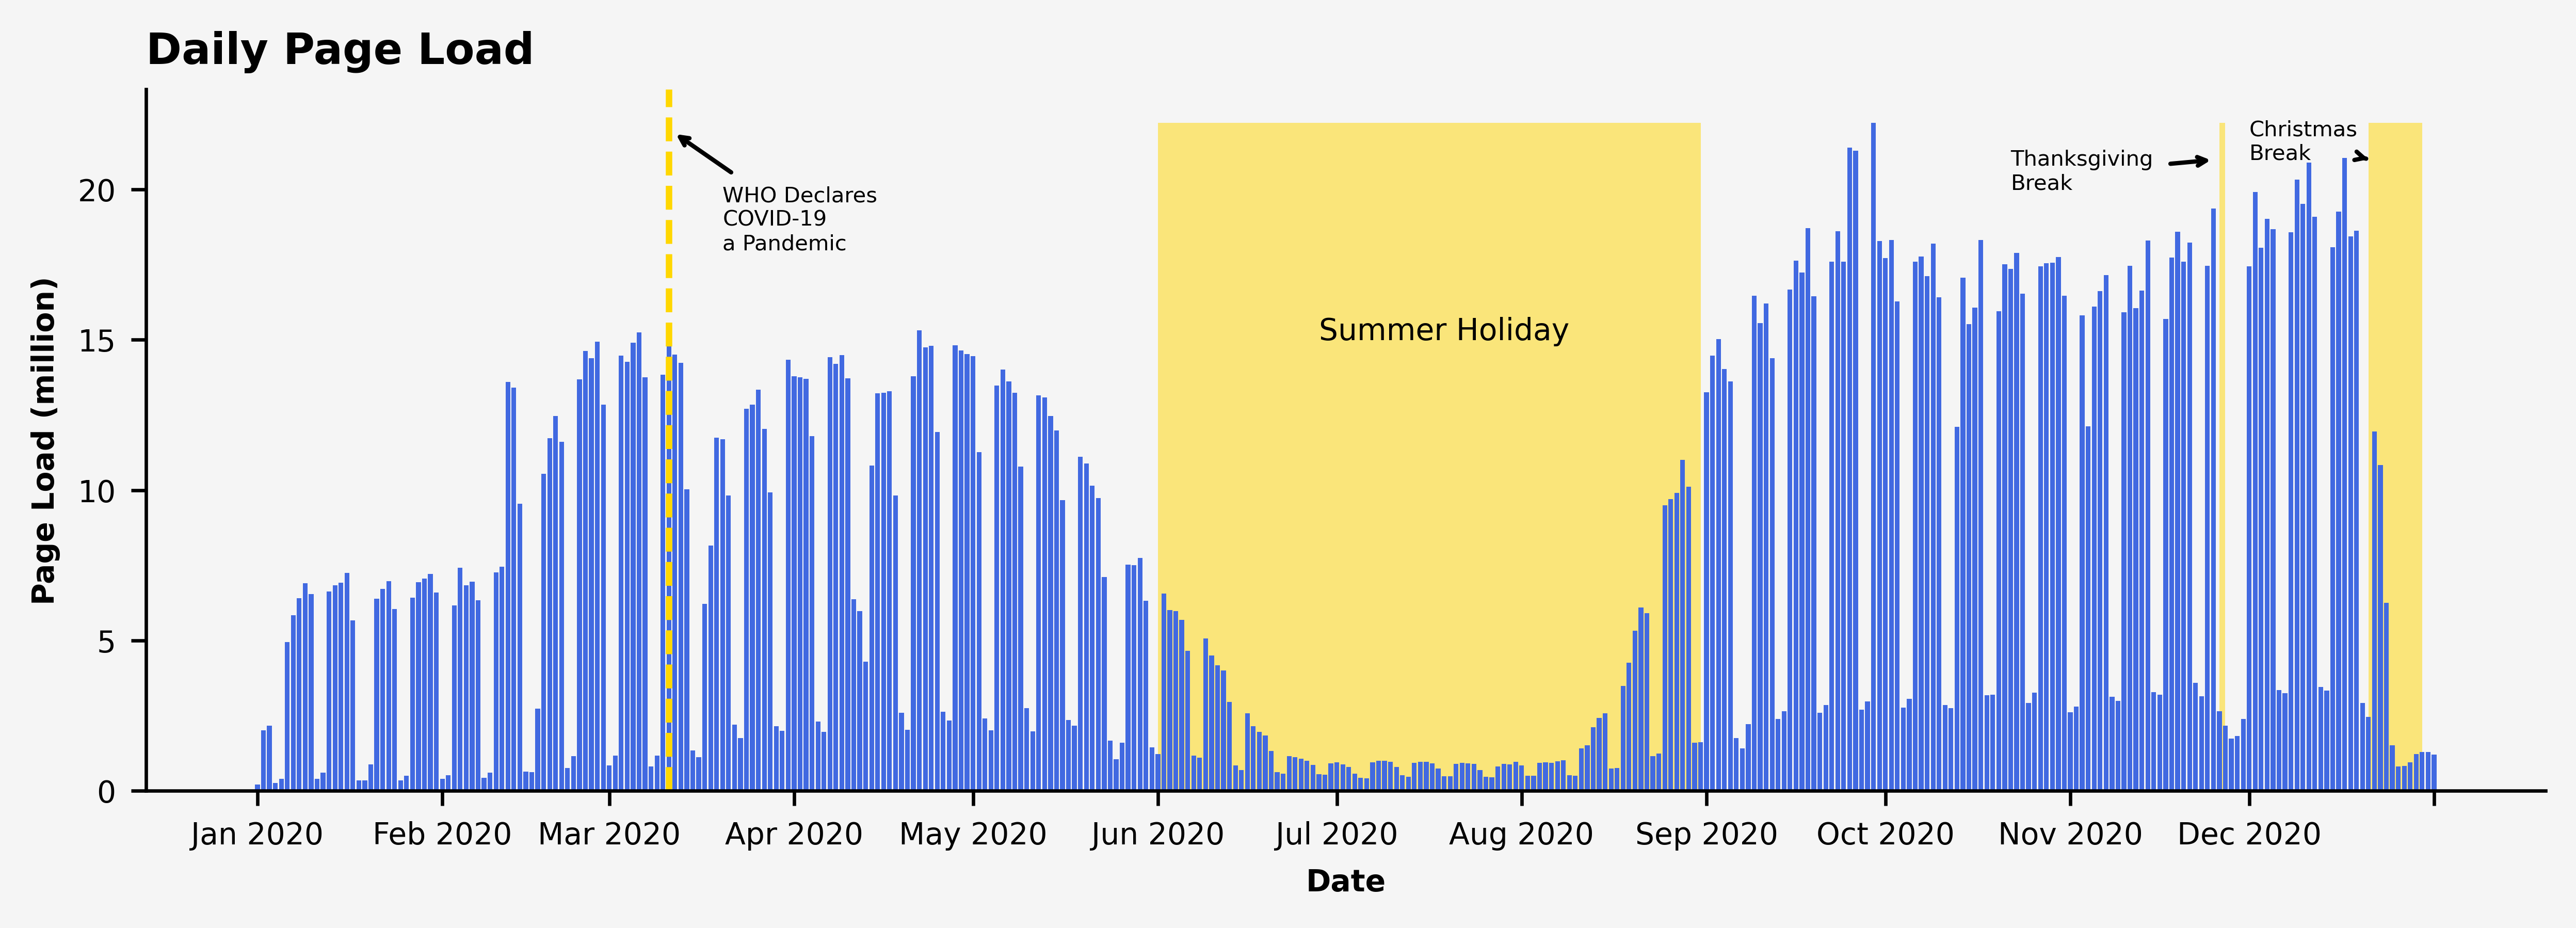

In [23]:
#Total page load overtime
pageload= pd.DataFrame(data.groupby('time')['engagement_index'].sum()/1000000)

fig = plt.figure(figsize=(10,3), dpi=600, facecolor='whitesmoke')
gs= fig.add_gridspec(1,1)
ax1= fig.add_subplot(gs[0,0])
ax1.set_facecolor('whitesmoke')

#graph
ax1= sns.barplot(ax=ax1, x=pageload.index, y='engagement_index', data= pageload, color= 'royalblue', saturation=1, linewidth=0.8)
summer= np.arange(np.datetime64('1970-06-01'), np.datetime64('1970-09-01'))
thanksgiving= np.arange(np.datetime64('1970-11-26'), np.datetime64('1970-11-28'))
christmas= np.arange(np.datetime64('1970-12-21'), np.datetime64('1970-12-31'))
breaks= [summer, thanksgiving, christmas]
for b in breaks:
    ax1.fill_between(b, np.max(pageload['engagement_index']), color='gold', alpha=0.5, linewidth=0)
plt.axvline(x= np.datetime64('1970-03-11'), linestyle='--', color= 'gold')
sns.despine(top=True, right= True)

#axis and title
ax1.set_xlabel('Date', fontweight='bold', fontsize= 7)
ax1.set_ylabel('Page Load (million)', fontweight='bold', fontsize=7)
ax1.set_title('Daily Page Load', fontweight='bold', fontsize=10, loc='left', color='black')

#annotation
ax1.annotate('WHO Declares\nCOVID-19\na Pandemic',
            xy= (np.datetime64('1970-03-11'), 22),
            xytext= (np.datetime64('1970-03-20'), 18),
            fontsize=5, arrowprops= dict(arrowstyle= '->'))

ax1.annotate('Summer Holiday',
            xy= (np.datetime64('1970-07-01'), 20),
            xytext= (np.datetime64('1970-06-28'),15),
            fontsize=7)

ax1.annotate('Thanksgiving\nBreak',
            xy= (np.datetime64('1970-11-26'), 21),
            xytext= (np.datetime64('1970-10-22'), 20),
            fontsize=5, arrowprops= dict(arrowstyle= '->'))

ax1.annotate('Christmas\nBreak',
            xy= (np.datetime64('1970-12-21'), 21),
            xytext= (np.datetime64('1970-12-01'), 21),
            fontsize=5, arrowprops= dict(arrowstyle= '->'))

#format ticks
ax1.tick_params(axis='both', which= 'major', labelsize=7)
fmt_months= mdates.MonthLocator()
ax1.xaxis.set_major_locator(fmt_months)
ax1.set_xticklabels(['Jan 2020', 'Feb 2020', 'Mar 2020', 'Apr 2020', 'May 2020', 'Jun 2020', 'Jul 2020', 'Aug 2020', 'Sep 2020', 'Oct 2020', 'Nov 2020', 'Dec 2020'])


plt.show()



#### b) Product Accessed

#### Observations:
> There were total of 8646 products in 2000 and approximately 2000-4000 products being used daily. 

> From Jan to mid-Feb 2020, there were approximately more than 2500 products used daily and it increased to more than 3000 and even close to 4000 products by end of February. The frequency trend is similar with the page load distribution.

<ipython-input-24-fbb675814b40>:50: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['Jan 2020', 'Feb 2020', 'Mar 2020', 'Apr 2020', 'May 2020', 'Jun 2020', 'Jul 2020', 'Aug 2020', 'Sep 2020', 'Oct 2020', 'Nov 2020', 'Dec 2020'])


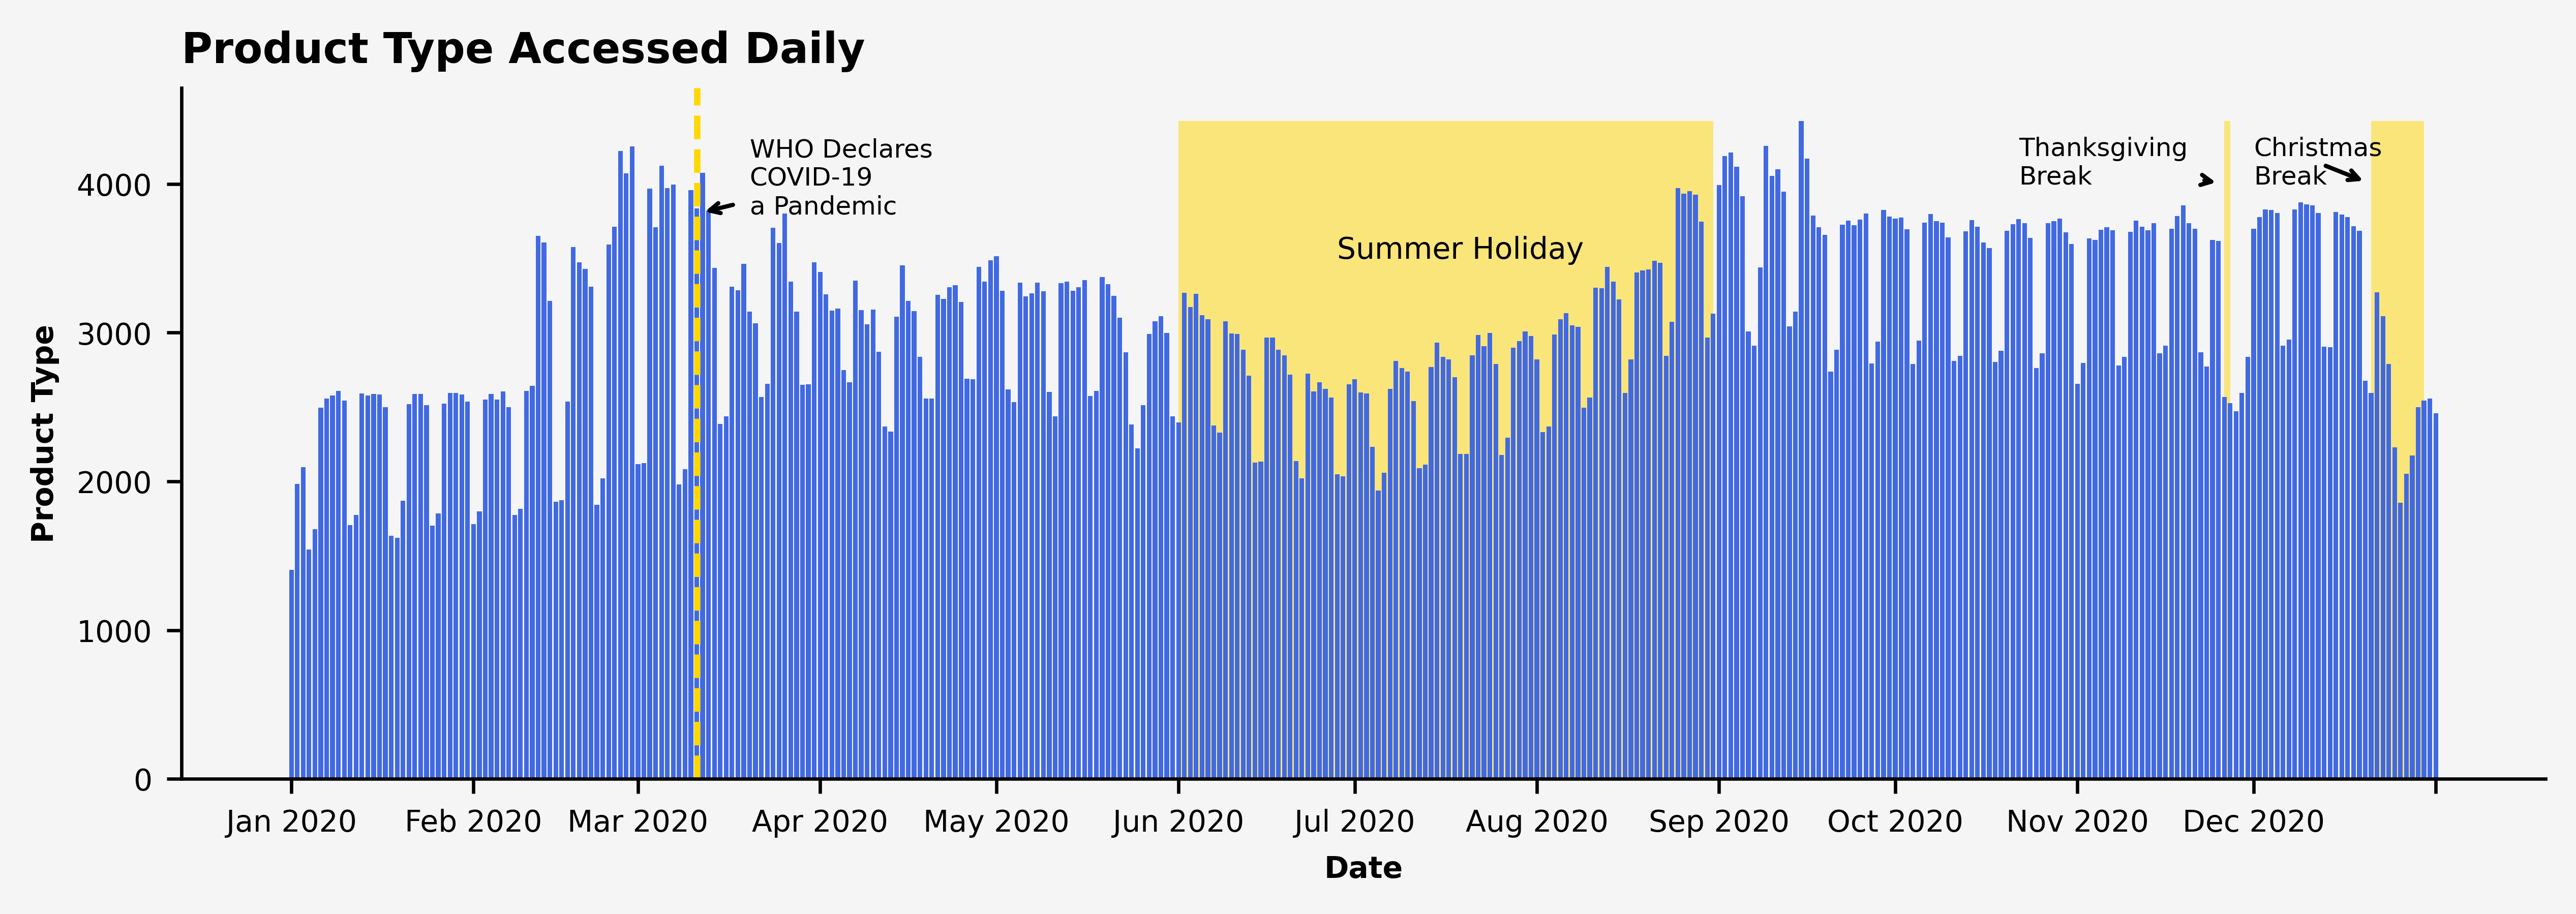

In [24]:
#total product types accessed daily
product_type= pd.DataFrame(data.groupby('time')['lp_id'].nunique()).reset_index()

fig = plt.figure(figsize=(10,3), dpi=600, facecolor='whitesmoke')
gs= fig.add_gridspec(1,1)
ax1= fig.add_subplot(gs[0,0])
ax1.set_facecolor('whitesmoke')

#graph
ax1= sns.barplot(ax=ax1, x=product_type.index, y='lp_id', data= product_type, color= 'royalblue', saturation=1, linewidth=0.8)
summer= np.arange(np.datetime64('1970-06-01'), np.datetime64('1970-09-01'))
thanksgiving= np.arange(np.datetime64('1970-11-26'), np.datetime64('1970-11-28'))
christmas= np.arange(np.datetime64('1970-12-21'), np.datetime64('1970-12-31'))
breaks= [summer, thanksgiving, christmas]
for b in breaks:
    ax1.fill_between(b, np.max(product_type['lp_id']), color='gold', alpha=0.5, linewidth=0)
plt.axvline(x= np.datetime64('1970-03-11'), linestyle='--', color= 'gold')
sns.despine(top=True, right= True)

#axis and title
ax1.set_xlabel('Date', fontweight='bold', fontsize= 7)
ax1.set_ylabel('Product Type', fontweight='bold', fontsize=7)
ax1.set_title('Product Type Accessed Daily', fontweight='bold', fontsize=10, loc='left', color='black')

#annotation
ax1.annotate('WHO Declares\nCOVID-19\na Pandemic',
            xy= (np.datetime64('1970-03-11'), 3800),
            xytext= (np.datetime64('1970-03-20'), 3800),
            fontsize=6, arrowprops= dict(arrowstyle= '->'))

ax1.annotate('Summer Holiday',
            xy= (np.datetime64('1970-07-01'), 3500),
            xytext= (np.datetime64('1970-06-28'),3500),
            fontsize=7)

ax1.annotate('Thanksgiving\nBreak',
            xy= (np.datetime64('1970-11-26'), 4000),
            xytext= (np.datetime64('1970-10-22'), 4000),
            fontsize=6, arrowprops= dict(arrowstyle= '->'))

ax1.annotate('Christmas\nBreak',
            xy= (np.datetime64('1970-12-21'), 4000),
            xytext= (np.datetime64('1970-12-01'), 4000),
            fontsize=6, arrowprops= dict(arrowstyle= '->'))

#format ticks
ax1.tick_params(axis='both', which= 'major', labelsize=7)
fmt_months= mdates.MonthLocator()
ax1.xaxis.set_major_locator(fmt_months)
ax1.set_xticklabels(['Jan 2020', 'Feb 2020', 'Mar 2020', 'Apr 2020', 'May 2020', 'Jun 2020', 'Jul 2020', 'Aug 2020', 'Sep 2020', 'Oct 2020', 'Nov 2020', 'Dec 2020'])


plt.show()



#### 2.2 Product

What are the top 20 most frequent used products, in what sectors were these products used in and what functionality do these products provide?

#### a) Product and Provider

#### Observations:

> Majority of the top 10 products used are Google products and the top provider is Google which contributed around 1600 million page load in year 2020. 

> On the other hand, there are also many missing data, which makes the 'unknown' as the second highest in both Top 10 Products and Top 10 Providers. 

> Besides, YouTube also ranks as the top 5 product which suggest that besides education purpose, students may also be using the product for entertainment purpose.

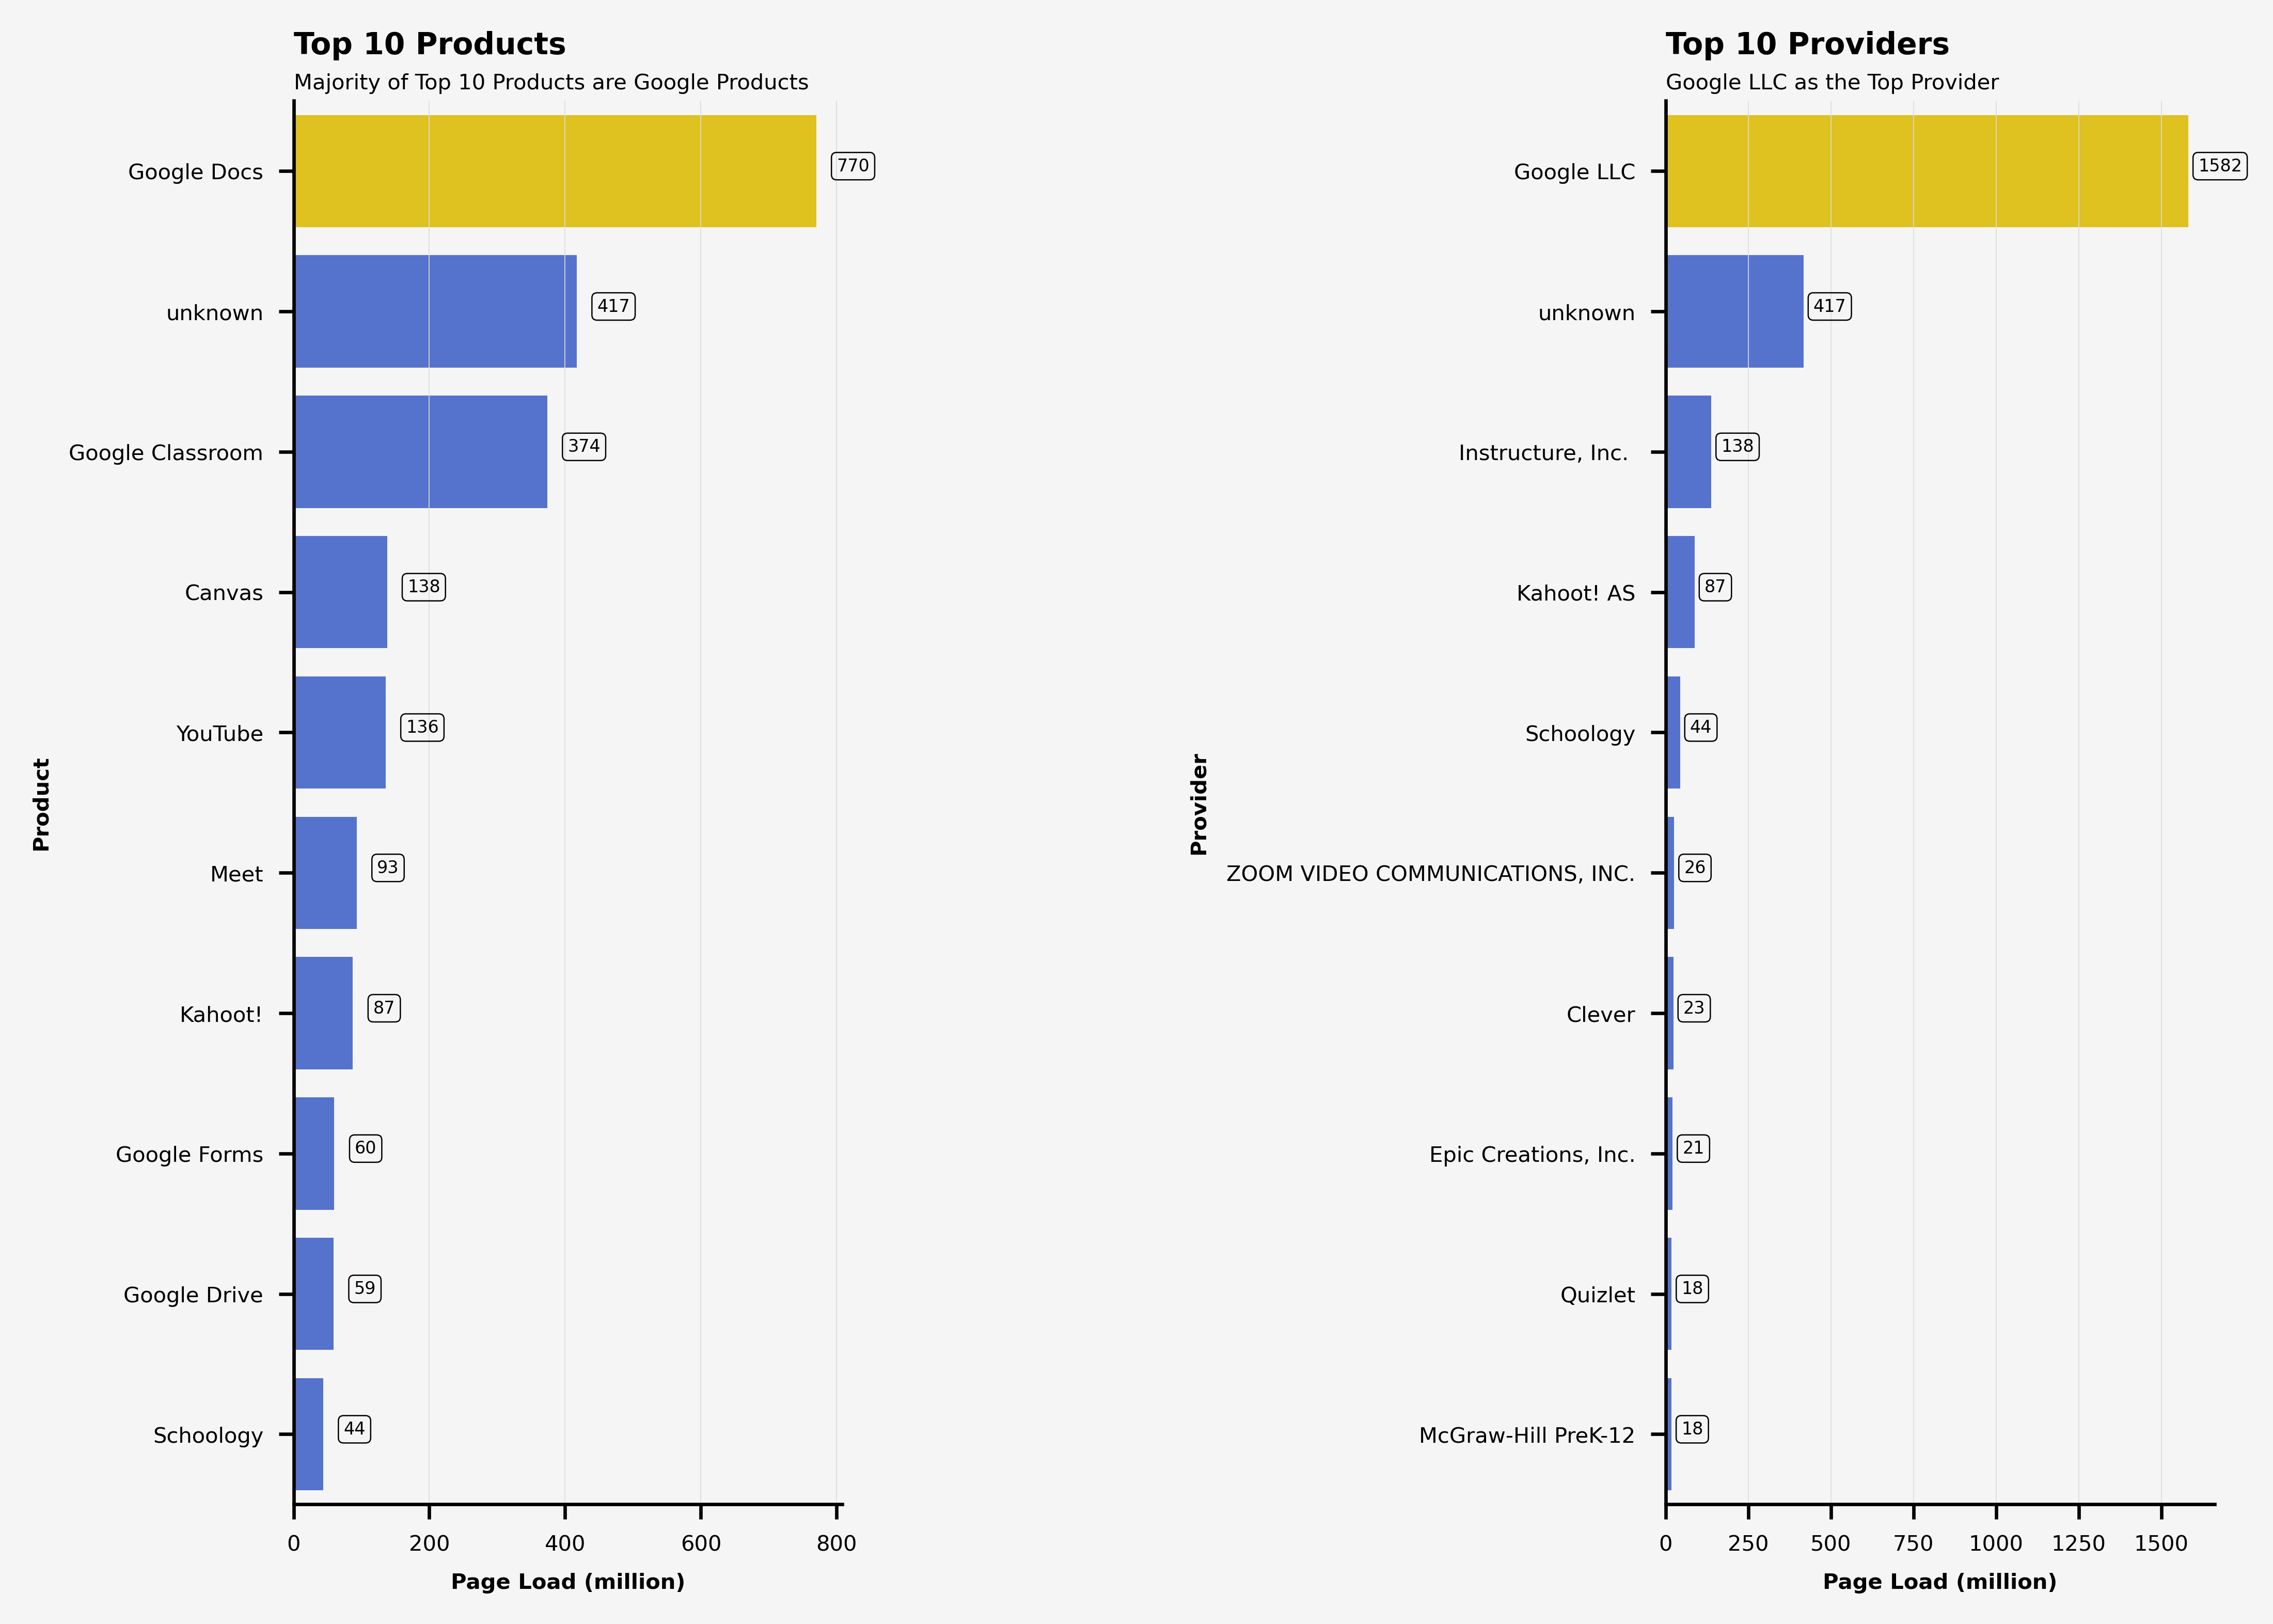

In [25]:
#graph
fig = plt.figure(figsize=(8,6), dpi=600, facecolor='whitesmoke')
gs= fig.add_gridspec(1,2)
gs.update(wspace= 1.5, hspace=1.5)


#top15 product
product= pd.DataFrame(data.groupby('product_name', dropna=False)['engagement_index'].sum()/1000000)\
                          .reset_index()\
                          .fillna('unknown')\
                          .sort_values('engagement_index', ascending=False)
product.columns= ['product', 'page load(million)']
product= product.fillna('Unknown')
top10= product[:10]

#set color
background_color= 'gainsboro'
color_map = ["royalblue" for _ in range(30)]
color_map[0] = "gold"
sns.set_palette(sns.color_palette(color_map))

#plot
ax1= fig.add_subplot(gs[0,0])
ax1.set_facecolor('whitesmoke')
sns.despine(top=True, right=True)
ax1= sns.barplot(x= 'page load(million)', y= 'product', data= top10, orient='h')

#title and axis
ax1.set_xlabel('Page Load (million)', fontweight='bold', fontsize=5)
ax1.set_ylabel('Product', fontweight='bold', fontsize=5)
ax1.tick_params(axis='both', which='major', labelsize=5)
ax1.grid(color='gainsboro', linewidth=0.2, which='major', axis='x')

#title
x0, x1 = ax1.get_xlim()
y0, y1 = ax1.get_ylim()
ax1.text(x0, y1-0.5, 'Top 10 Products', fontsize=7, ha='left', va='top', weight='bold')
ax1.text(x0, y1-0.2, 'Majority of Top 10 Products are Google Products', fontsize=5, ha='left', va='top')

# data label
for p in ax1.patches:
    value = round(p.get_width())
    x = p.get_x() + p.get_width()+30
    y = p.get_y() + p.get_height() / 2 
    ax1.text(x, y, value, fontsize=4, 
            bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.3))

#top15 provider
provider= pd.DataFrame(data.groupby('provider/company_name', dropna=False)['engagement_index'].sum()/1000000)\
                           .reset_index()\
                           .fillna('unknown')\
                           .sort_values('engagement_index', ascending=False)
provider.columns= ['provider', 'page load(million)']
provider= provider.fillna('Unknown')
top10= provider[:10]

background_color='gainsboro'
color_map = ["royalblue" for _ in range(30)]
color_map[0] = "gold"
sns.set_palette(sns.color_palette(color_map))

ax2= fig.add_subplot(gs[0,1])
ax2.set_facecolor('whitesmoke')
sns.despine(top=True, right=True)
ax2= sns.barplot(x= 'page load(million)', y= 'provider', data= top10, orient='h')
ax2.grid(color='gainsboro', linewidth=0.2, which='major', axis='x')

#set title and axis
ax2.set_xlabel('Page Load (million)', fontweight='bold', fontsize=5)
ax2.set_ylabel('Provider', fontweight='bold', fontsize=5)
ax2.tick_params(axis='both', which='major', labelsize=5)

#title
x0, x1= ax2.get_xlim()
y0, y1= ax2.get_ylim()
ax2.text(x0, y1-0.5, 'Top 10 Providers', fontsize=7, ha='left', va='top', weight='bold')
ax2.text(x0, y1-0.2, 'Google LLC as the Top Provider', fontsize=5, va='top', ha='left')

#data label
for p in ax2.patches:
    value= round(p.get_width())
    x= p.get_x() + p.get_width()+30
    y= p.get_y() + p.get_height()/2    
    ax2.text(x, y, value, fontsize=4,
            bbox= dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.3))
    

plt.show()



#### b) Product Preference in Summer Break and Fall Semester

#### Observations:

> There is not much difference in the top 10 product preference in Summer Break and Fall Semester. 

> Majority of the top 10 products in both periods are from Google.

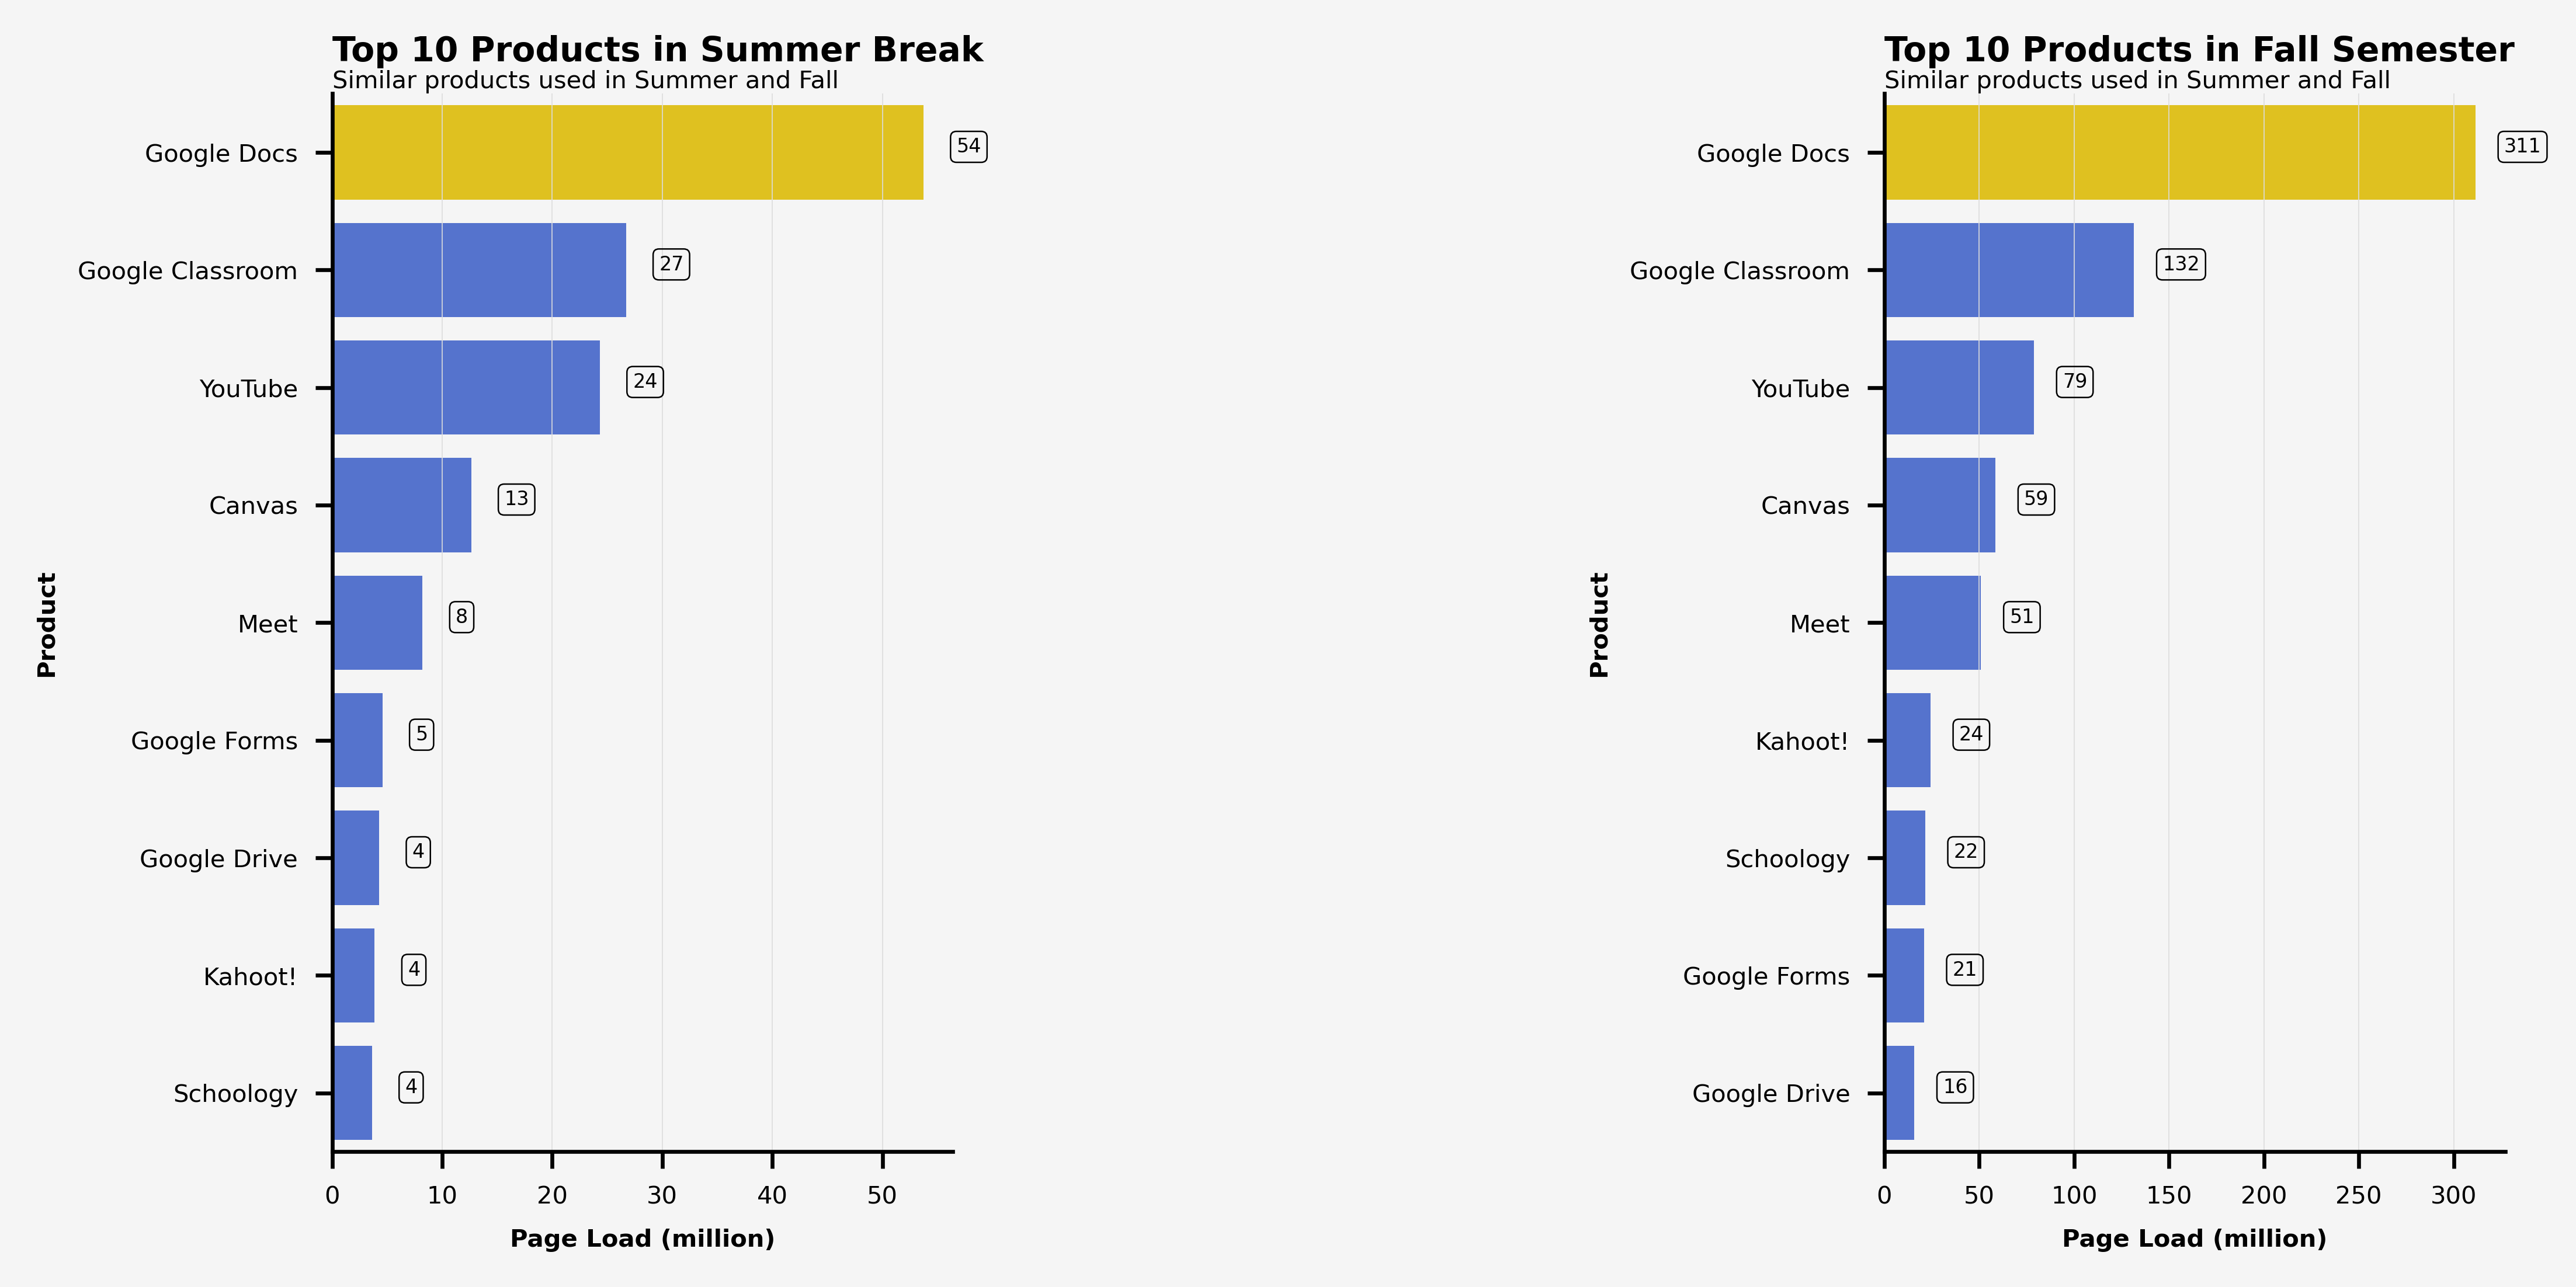

In [26]:
####SUMMER####
data['time'] = pd.to_datetime(data['time'])
mask = (data['time'] >= '2020-06-01') & (data['time'] <= '2020-09-01')
summer= data.loc[mask]
summer_prod= pd.DataFrame(summer.groupby(['product_name'], dropna=False)['engagement_index'].sum()/1000000).reset_index()
summer_prod= summer_prod.sort_values('engagement_index', ascending=False)
summer_prod.columns= ['product', 'page load']
summer_prod= summer_prod[:10]

#graph
fig= plt.figure(figsize=(8,4), dpi=600, facecolor='whitesmoke')
gs= fig.add_gridspec(1,2)
gs.update(wspace= 1.5, hspace=1.5)

background_color= 'gainsboro'
color_map = ["royalblue" for _ in range(30)]
color_map[0] = "gold"
sns.set_palette(sns.color_palette(color_map))

#plot
ax1= fig.add_subplot(gs[0,0])
ax1.set_facecolor('whitesmoke')
sns.despine(top=True, right=True)
ax1= sns.barplot(x= 'page load', y= 'product', data= summer_prod, orient='h')

#title and axis
ax1.set_xlabel('Page Load (million)', fontweight='bold', fontsize=5)
ax1.set_ylabel('Product', fontweight='bold', fontsize=5)
ax1.tick_params(axis='both', which='major', labelsize=5)
ax1.grid(color='gainsboro', linewidth=0.2, which='major', axis='x')

#title
x0, x1 = ax1.get_xlim()
y0, y1 = ax1.get_ylim()
ax1.text(x0, y1-0.5, 'Top 10 Products in Summer Break', fontsize=7, ha='left', va='top', weight='bold')
ax1.text(x0, y1-0.2, 'Similar products used in Summer and Fall', fontsize=5, ha='left', va='top')

# data label
for p in ax1.patches:
    value = round(p.get_width())
    x = p.get_x() + p.get_width()+3
    y = p.get_y() + p.get_height() / 2 
    ax1.text(x, y, value, fontsize=4, 
            bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.3))


####FALL####
mask= (data['time']> '2020-09-01')&(data['time'] < '2020-11-26')
fall= data.loc[mask]
fall_prod= pd.DataFrame(fall.groupby('product_name', dropna=False)['engagement_index'].sum()/1000000).reset_index()
fall_prod= fall_prod.sort_values('engagement_index', ascending=False)
fall_prod.columns= ['product', 'page load']
fall_prod= fall_prod[:10]

background_color='gainsboro'
color_map = ["royalblue" for _ in range(30)]
color_map[0] = "gold"
sns.set_palette(sns.color_palette(color_map))

ax2= fig.add_subplot(gs[0,1])
ax2.set_facecolor('whitesmoke')
sns.despine(top=True, right=True)
ax2= sns.barplot(x= 'page load', y= 'product', data= fall_prod, orient='h')
ax2.grid(color='gainsboro', linewidth=0.2, which='major', axis='x')

#set title and axis
ax2.set_xlabel('Page Load (million)', fontweight='bold', fontsize=5)
ax2.set_ylabel('Product', fontweight='bold', fontsize=5)
ax2.tick_params(axis='both', which='major', labelsize=5)

#title
x0, x1= ax2.get_xlim()
y0, y1= ax2.get_ylim()
ax2.text(x0, y1-0.5, 'Top 10 Products in Fall Semester', fontsize=7, ha='left', va='top', weight='bold')
ax2.text(x0, y1-0.2, 'Similar products used in Summer and Fall', fontsize=5, va='top', ha='left')

#data label
for p in ax2.patches:
    value= round(p.get_width())
    x= p.get_x() + p.get_width()+15
    y= p.get_y() + p.get_height()/2    
    ax2.text(x, y, value, fontsize=4,
            bbox= dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.3))
plt.show()



#### c) Non-Google Product

#### Observations:

> Canvas, Kahoot! and Schoology are ranked as the top 3 products when we exclude Google products. 

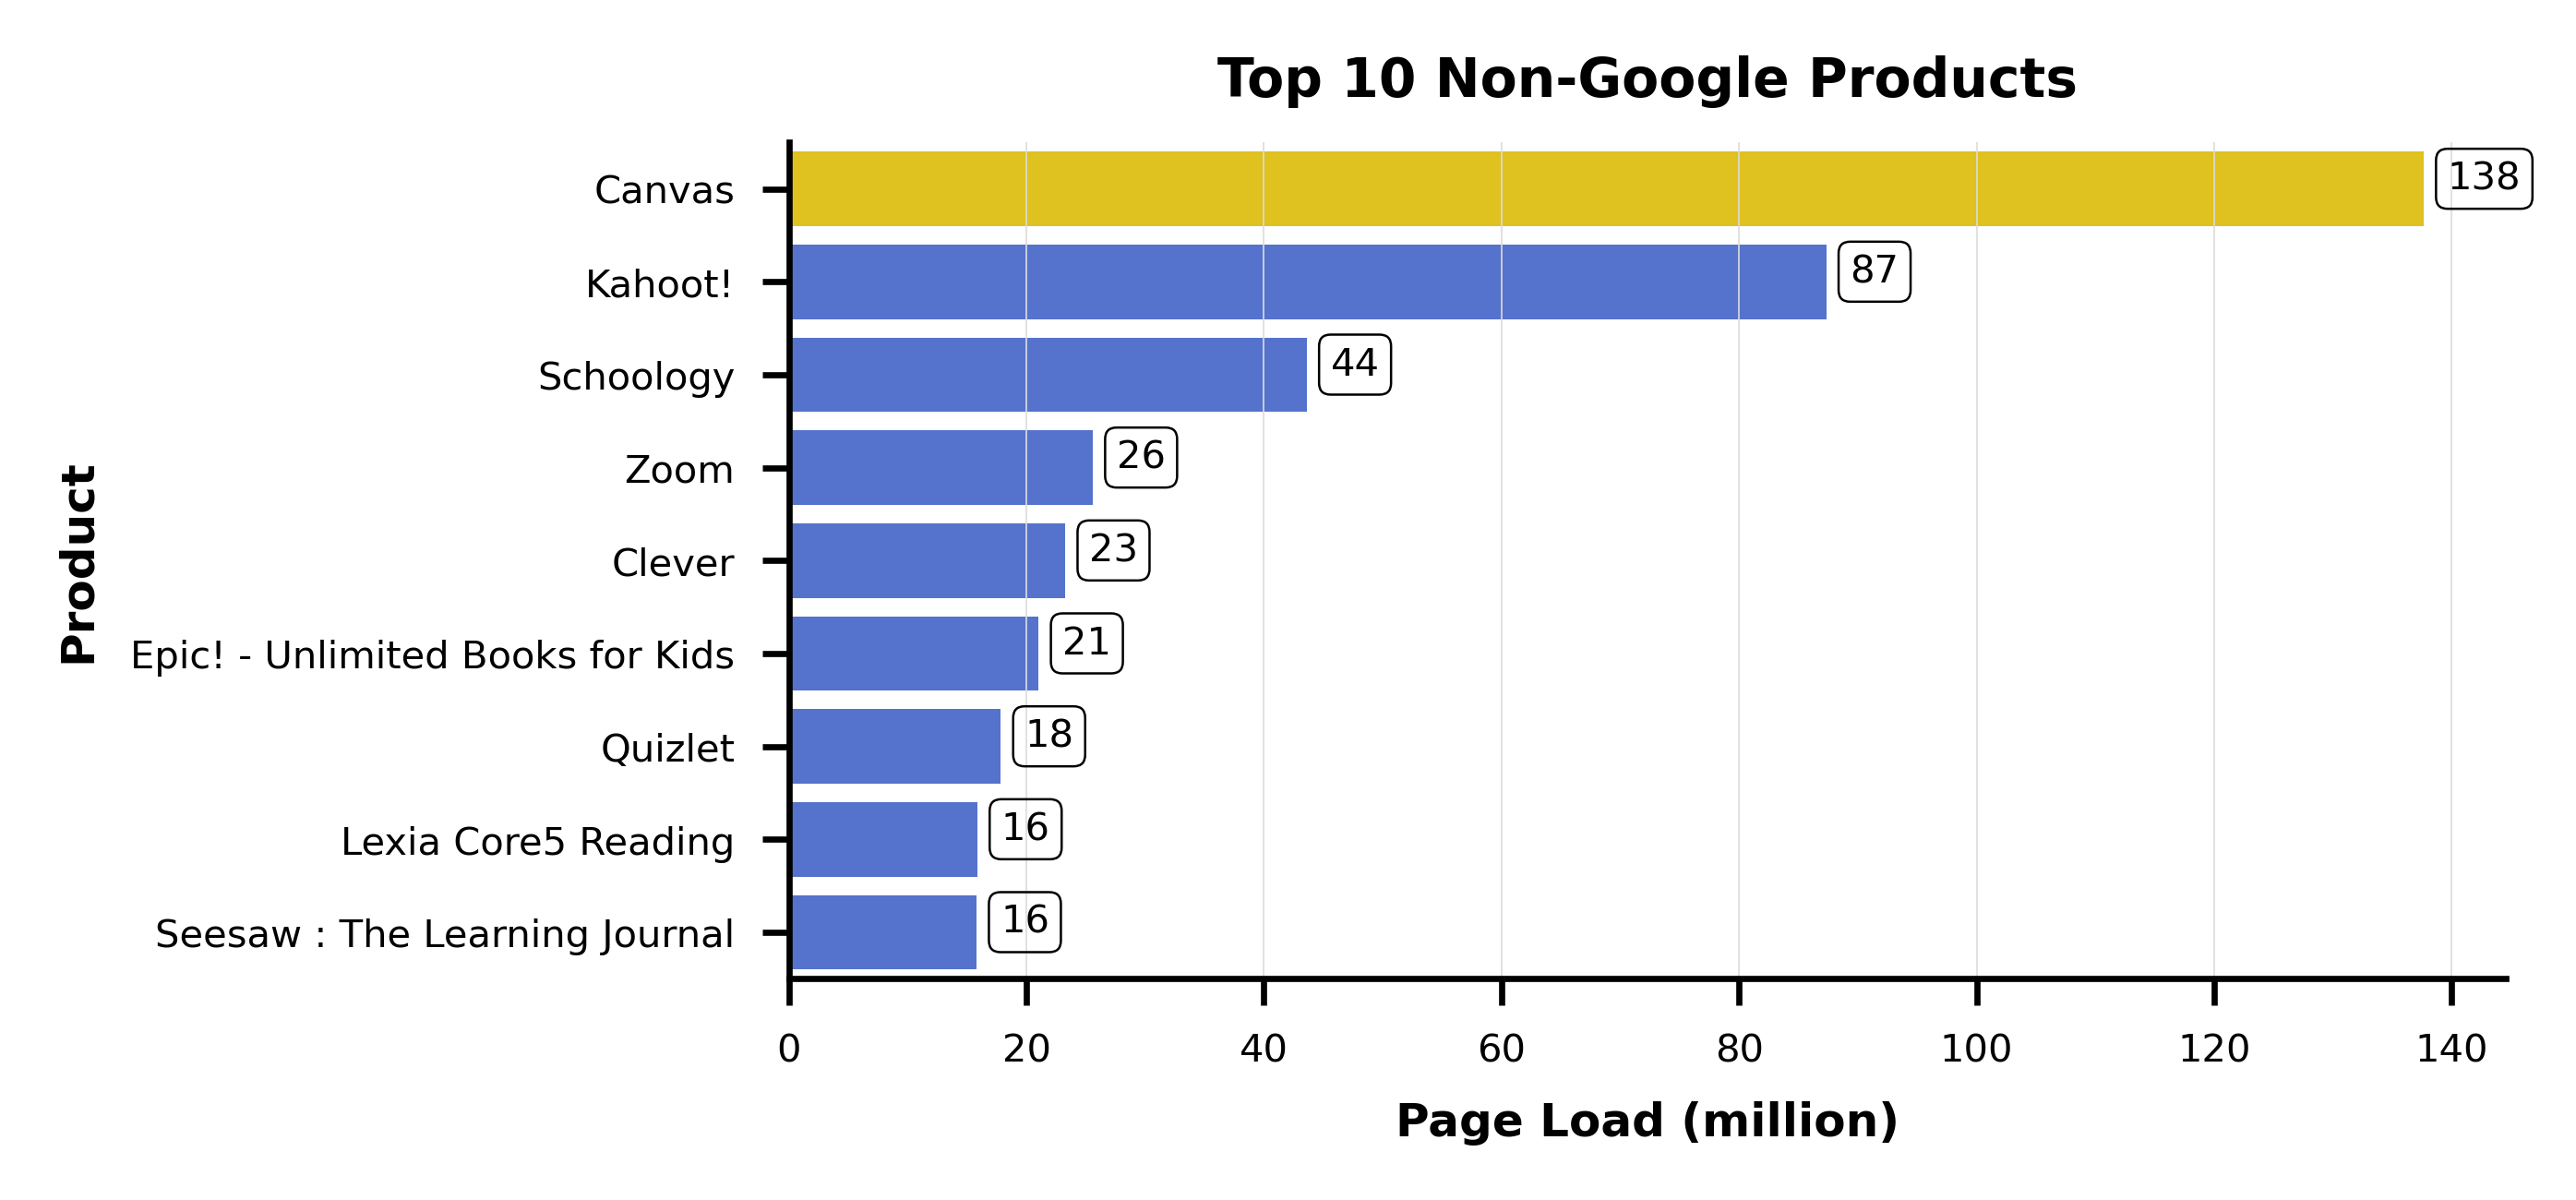

In [46]:
#temp= data.loc[data['provider/company_name']!= 'Google LLC']
#oprod= pd.DataFrame(temp.groupby('product_name', dropna=False)['engagement_index'].sum()/1000000).reset_index()
#oprod= oprod.sort_values('engagement_index', ascending=False)
#oprod.columns= ['product', 'page load']
#oprod= oprod[:10]

#graph
background_color= 'gainsboro'
color_map= ['royalblue' for _ in range(25)]
color_map[0]= 'gold'
sns.set_palette(sns.color_palette(color_map))

fig= plt.figure(figsize=(4,2), dpi=600)
ax= sns.barplot(x='page load', y= 'product', data= oprod)
for s in ["right", "top"]:
    ax.spines[s].set_visible(False)
ax.grid(color='gainsboro', linewidth=0.2, which='major', axis='x')
ax.set_xlabel('Page Load (million)', fontweight='bold', fontsize=6)
ax.set_ylabel('Product', fontweight='bold', fontsize=6)
ax.tick_params(axis='both', which='major', labelsize=5)
ax.set_title('Top 10 Non-Google Products', fontsize=7, fontweight='bold')

#data label
for p in ax.patches:
    value= round(p.get_width())
    x= p.get_x() + p.get_width()+2
    y= p.get_y() + p.get_height()/2    
    ax.text(x, y, value, fontsize=5,
            bbox= dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.3))
plt.show()




#### d) Product Function and Sector

#### Observations:

> About 2 billion (68%) of page load was contributed by the product which can be used for PreK-12, Higher Ed and Corporate, followed by the unknown sector which contributed 425 million (15%) of page load, whereas the third place was from product for preK-12 sector (close to 4 million of page load).

> By category, 57% of page load was for Learning & Curriculum category, followed by 17.43% for the School & District Operations category and 14.95% from the unknown.

> Under the Learning & Curriculum category, 51% of page load was from product for Content Creation & Curation subcategory, followed by Digital Learning Platforms (15%) and Sites, Resources & Reference- Streaming Services (9.8%).

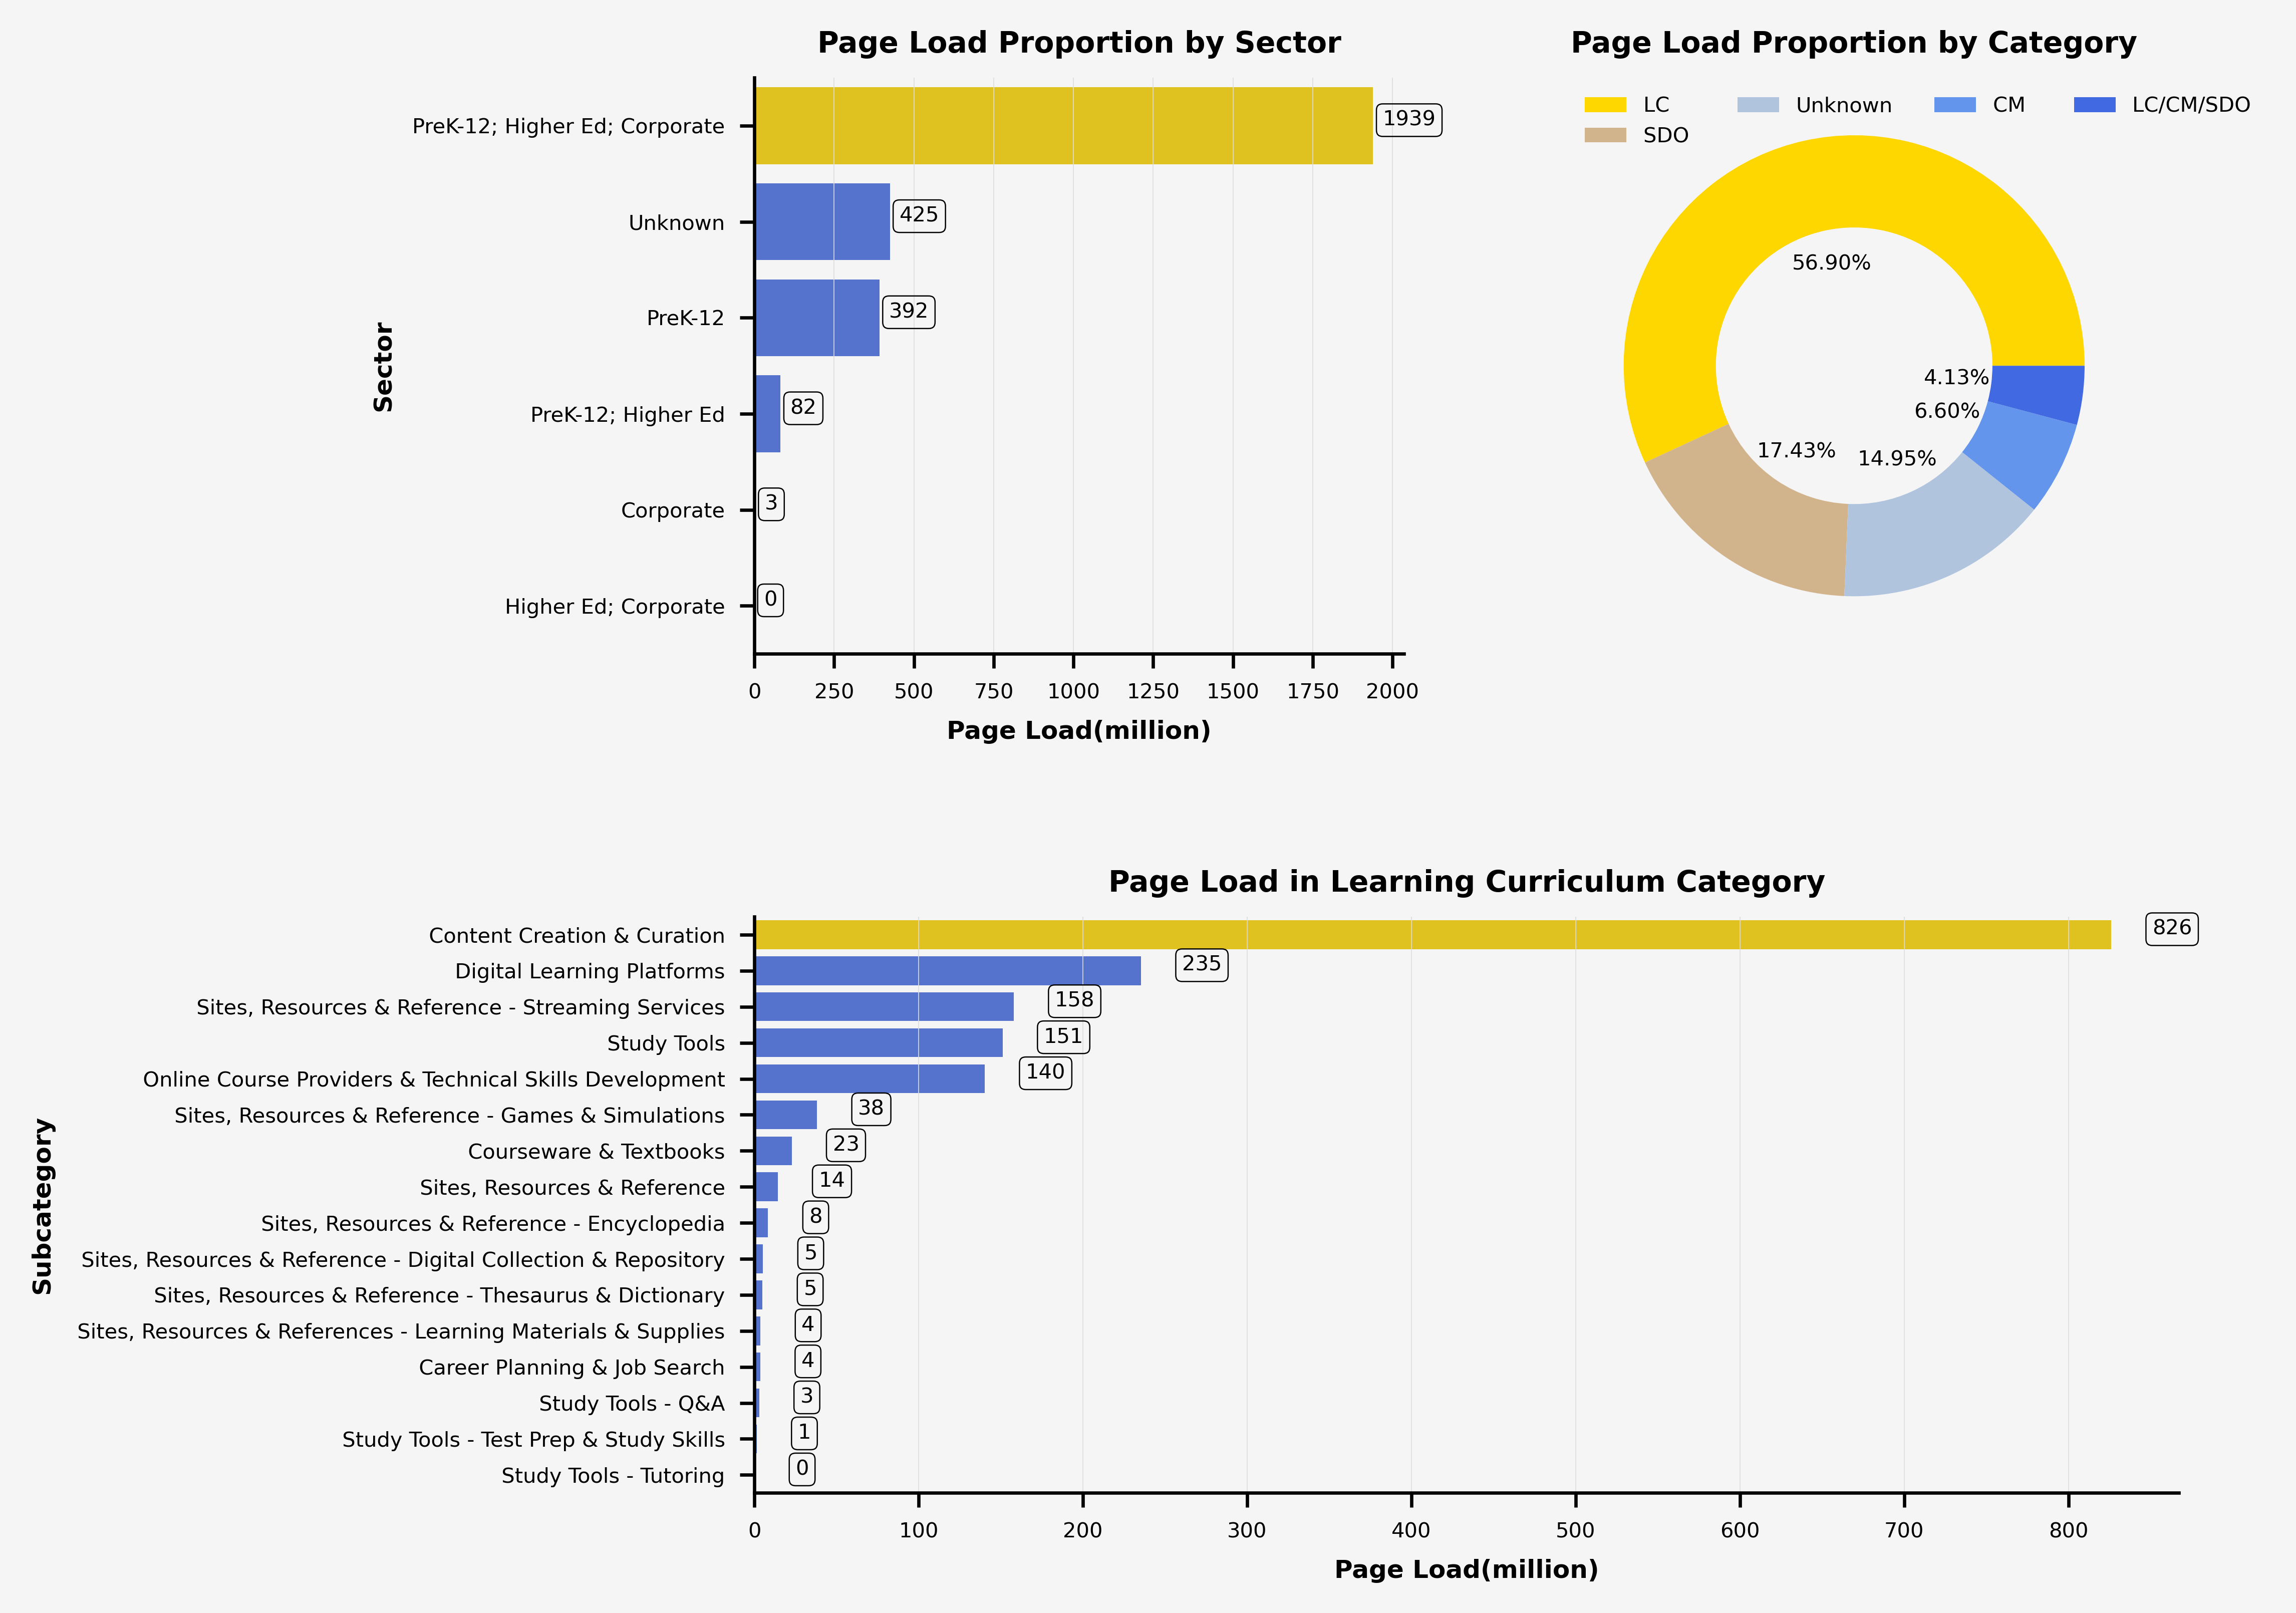

In [25]:
fig= plt.figure(figsize=(8,6), dpi=600, facecolor='whitesmoke')
gs= fig.add_gridspec(2,2)

####sector####
sector= pd.DataFrame((data.groupby('sector(s)', dropna=False)['engagement_index'].sum()/1000000).reset_index())\
                          .sort_values('engagement_index', ascending=False)
sector.columns=['sector', 'page_load']
sector= sector.fillna('Unknown')

#set color
background_color='gainsboro'
color_map = ["royalblue" for _ in range(10)]
color_map[0] = "gold"
sns.set_palette(sns.color_palette(color_map))

#piechart
ax1= fig.add_subplot(gs[0,0])
color_map= ['gold', 'tan', 'lightsteelblue', 'cornflowerblue', 'royalblue', 'navy']
ax1=sns.barplot(ax=ax1, x='page_load', y='sector', data=sector, orient='h')
ax1.set_facecolor('whitesmoke')
ax1.grid(color='gainsboro', linewidth=0.2, which='major', axis='x')



#title and legend
ax1.set_title('Page Load Proportion by Sector', size= 7, weight='bold')
ax1.set_xlabel('Page Load(million)', fontweight='bold', fontsize=6)
ax1.set_ylabel('Sector', fontweight='bold', fontsize=6)
ax1.tick_params(axis='both', which='major', labelsize=5)

for p in ax1.patches:
    x= p.get_x() + p.get_width() +30
    y= p.get_y() + p.get_height()/2
    value= round(p.get_width())
    ax1.text(x, y, value, fontsize=5,
          bbox= dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.3))
    



####main_category####
category= pd.DataFrame((data.groupby('main_category', dropna=False)['engagement_index'].sum()/1000000).reset_index())\
                            .sort_values('engagement_index', ascending=False)
category.columns=['category', 'page_load']
category= category.fillna('Unknown')

#piechart
ax2= fig.add_subplot(gs[0,1])
color_map= ['gold', 'tan', 'lightsteelblue', 'cornflowerblue', 'royalblue', 'navy']
ax2.pie(x=category['page_load'],
       colors=color_map,
       autopct= '%1.2f%%',
       pctdistance=0.45,
       wedgeprops= {'width':0.4},
       textprops= {'size':5, 'color':'black'})


#title and legend
ax2.set_title('Page Load Proportion by Category', size=7, weight='bold')
ax2.legend(category['category'], loc='upper left', ncol=4, prop= {'size':5}, frameon=False )

###subcategory####
sub= pd.DataFrame((data.groupby(['main_category', 'subcategory'], dropna=False)['engagement_index'].sum()/1000000)).reset_index()
subcategory= sub[7:23]
subcategory.columns= ['main_category', 'subcategory', 'page load']
subcategory= subcategory.fillna('Unknown')
subcategory= subcategory.sort_values('page load', ascending=False)

#set color
color_map = ["royalblue" for _ in range(25)]
color_map[0] = "gold"
sns.set_palette(sns.color_palette(color_map))

#barplot
ax3= fig.add_subplot(gs[1,:2])
ax3.set_facecolor('whitesmoke')
sns.despine(top=True, right=True)
ax3=sns.barplot(ax=ax3, x='page load', y='subcategory', data=subcategory, orient='h')
ax3.grid(color='gainsboro', linewidth=0.2, which='major', axis='x')

#title and axes
ax3.set_title('Page Load in Learning Curriculum Category', weight='bold', size=7)
ax3.set_xlabel('Page Load(million)', fontweight='bold', fontsize=6)
ax3.set_ylabel('Subcategory', fontweight='bold', fontsize=6)
ax3.tick_params(axis='both', which='major', labelsize=5)

for p in ax3.patches:
    x= p.get_x() + p.get_width() +25
    y= p.get_y() + p.get_height()/2
    value= round(p.get_width())
    ax3.text(x, y, value, fontsize=5,
          bbox= dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.3))

fig.tight_layout(pad=3.0)



#### 2.3 DEMOGRAPHIC

**Demographic**: How does page load differ across different location? What are the effects from demographic context (e.g., race/ethnicity, ESL, learning disability) and socioeconomic status?

#### Observations:

> Out of 2840 million page load, 21% (600 million) of page load comes from an unknown state which stands the first position of total page load ranking by state, followed by 18% from Conneticut (500 million page-load), 13% from Illinois (362 million) and 11% Massachusetts (300 million). 

> By locale type, suburb area accounts for 48% of the total page load, followed by unknown (21%) and rural area (16%); whereas town has the lowest contribution (3.5%).

> As the number of school districts recorded varies in all states, we can check on their mean page load for a better picture. Illinois has the highest mean page load (20 million). Interestingly, there is only one school from Arizona been included. Also, the graphs suggest that there are still many school districts have not been mapped in the dataset, which may shift the current observation patterns.

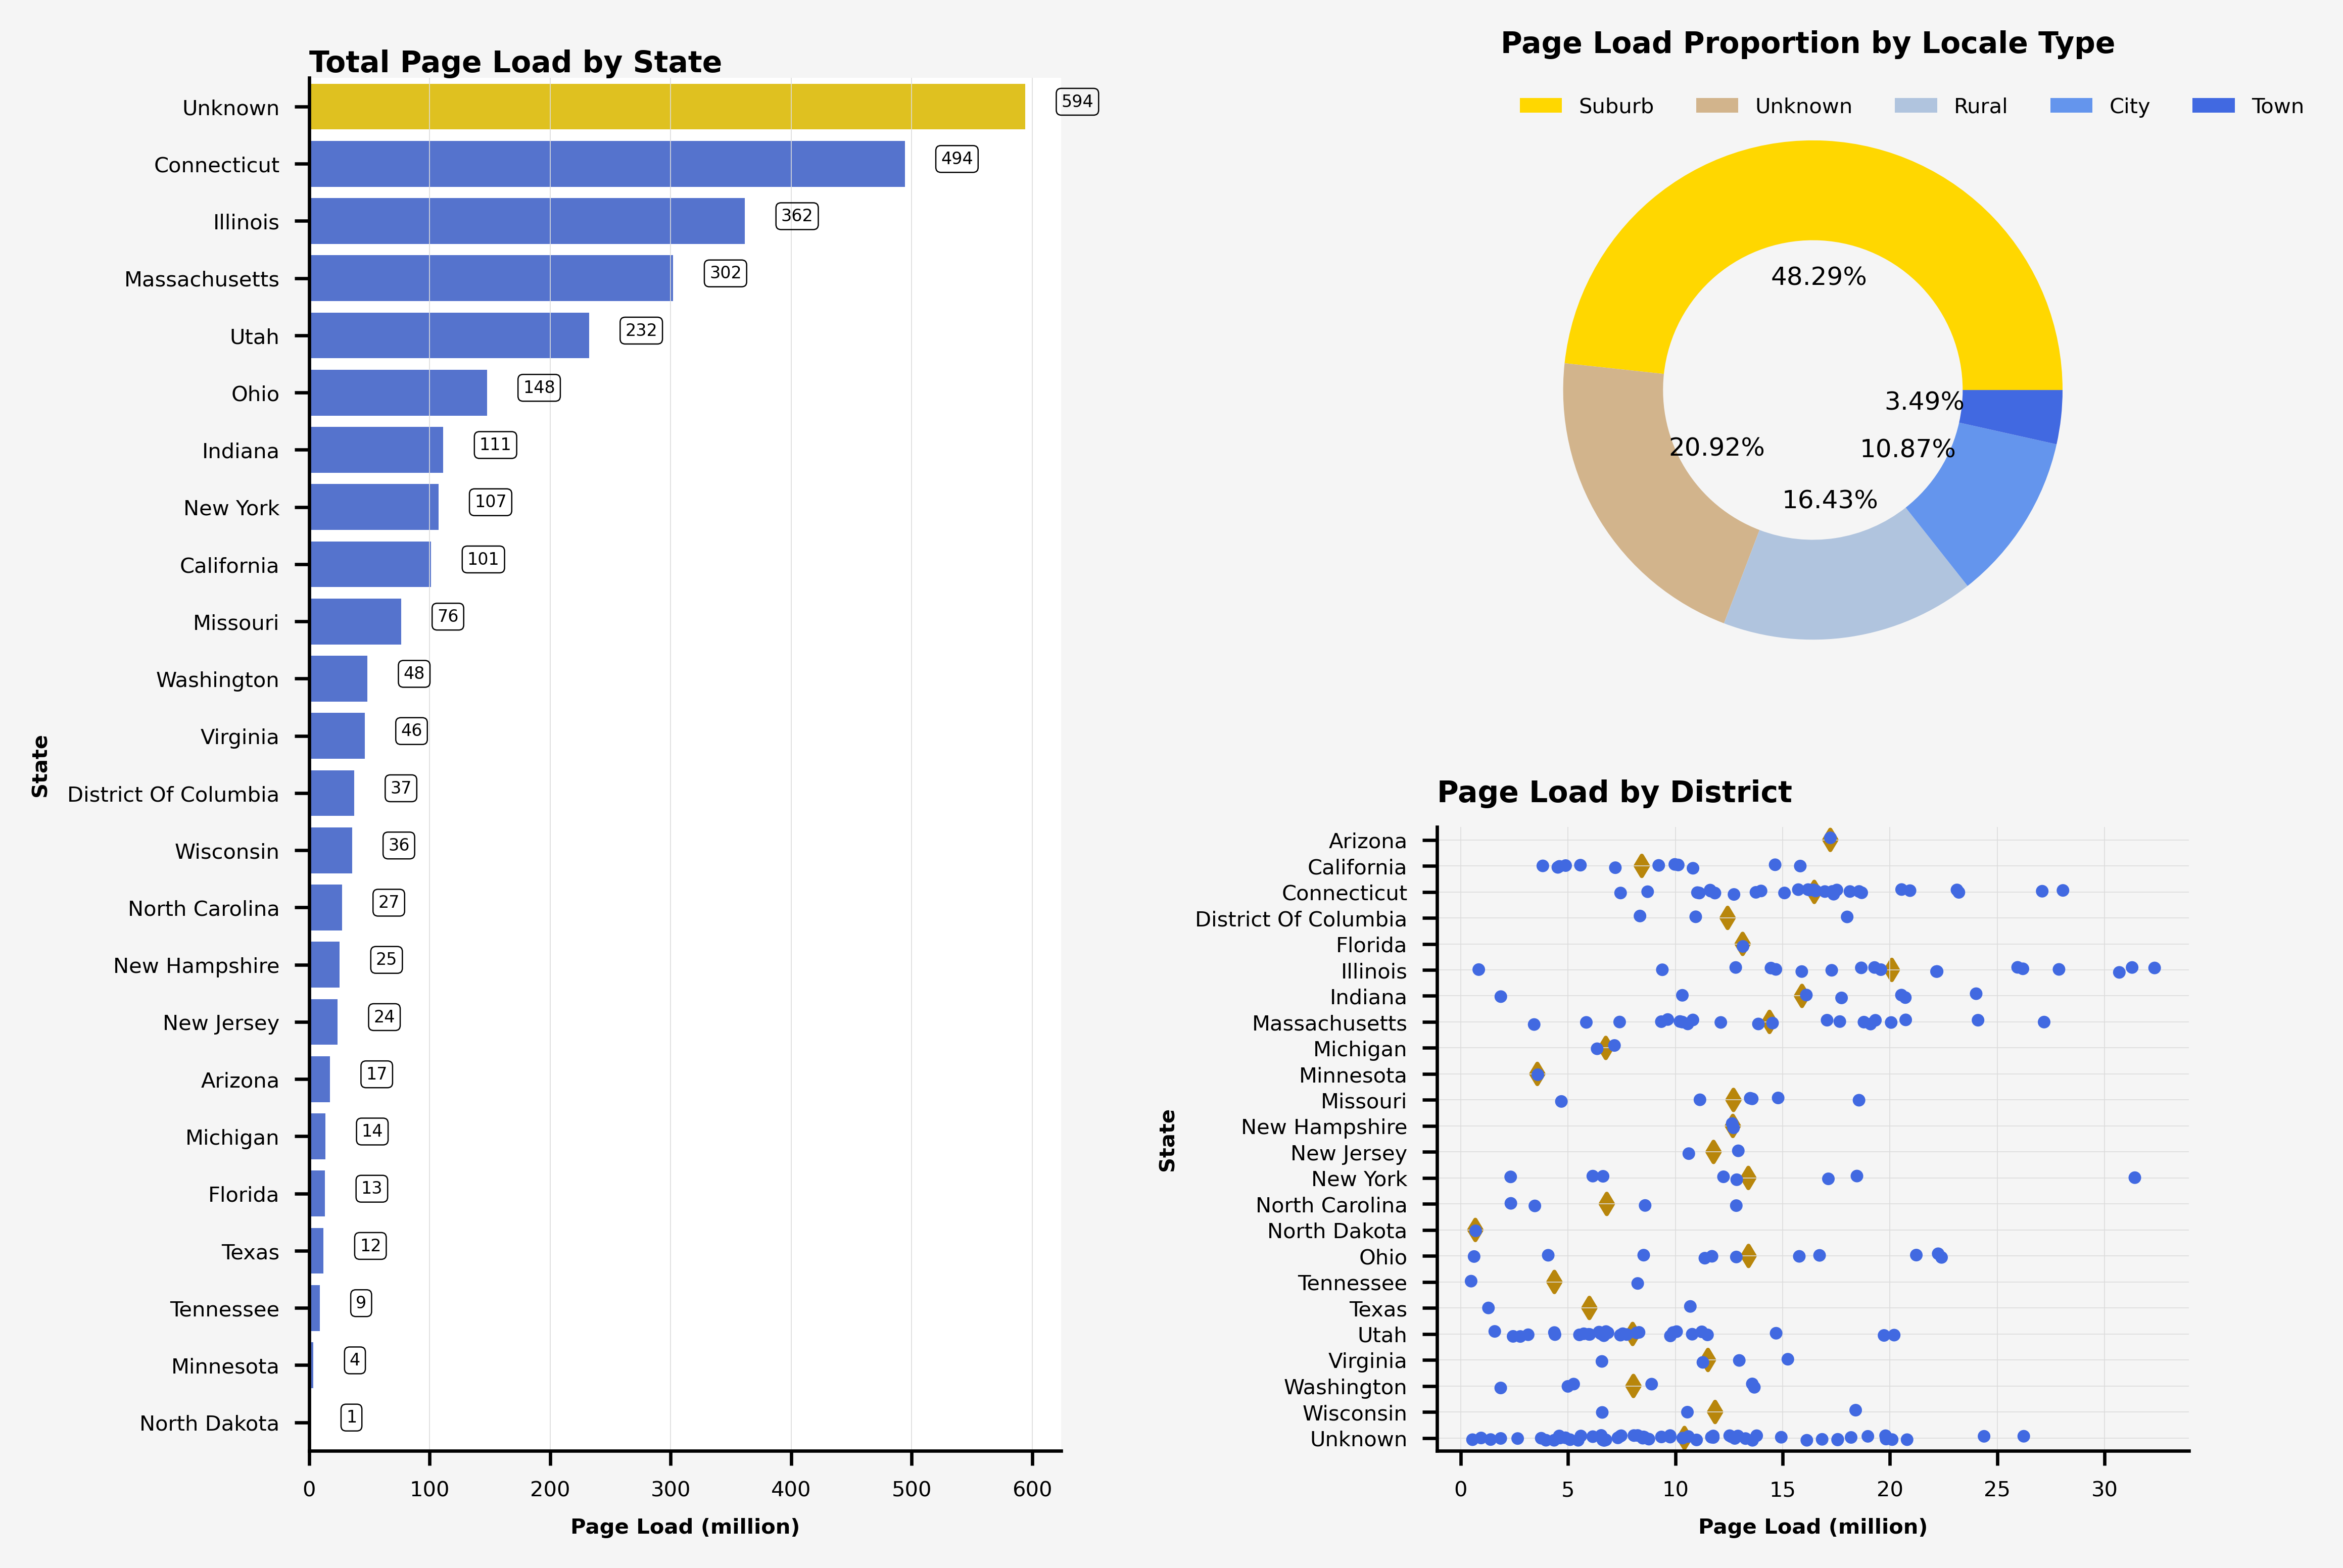

In [29]:
##STATE##
state= pd.DataFrame(data.groupby('state', dropna=False)['engagement_index'].sum()/1000000)\
                        .reset_index()\
                        .fillna('Unknown')\
                        .sort_values('engagement_index', ascending=False)
state.columns= ['state', 'page load(million)']

#set color
color_map = ["royalblue" for _ in range(30)]
color_map[0] = "gold"
sns.set_palette(sns.color_palette(color_map))

#plot graph
fig= plt.figure(figsize=(8,6), dpi=600, facecolor='whitesmoke')
gs= fig.add_gridspec(2,2)
gs.update(wspace=0.5, hspace=0.2)

ax1= fig.add_subplot(gs[0:2,0])
sns.despine(top=True, right= True)
ax1= sns.barplot(ax=ax1, x='page load(million)', y='state', data=state, orient='h')
ax1.grid(color='gainsboro', linewidth=0.2, which='major', axis='x')

#axis and title
ax1.set_xlabel('Page Load (million)', fontsize=5, fontweight='bold')
ax1.set_ylabel('State', fontsize=5, fontweight='bold')
ax1.tick_params(axis='both', which='major', labelsize=5)
x0, x1 = ax1.get_xlim()
y0, y1 = ax1.get_ylim()
ax1.text(x0, y1-0.5, 'Total Page Load by State', fontsize=7, weight='bold', ha='left', va='top')

for p in ax1.patches:
    value= round(p.get_width())
    x= p.get_x()+ p.get_width()+30
    y= p.get_y()+ p.get_height()/2
    ax1.text(x, y, value, fontsize=4, 
            bbox={'facecolor':'none', 'edgecolor':'black', 'boxstyle':'round', 'linewidth':0.3})

##DISTRICT##
district= pd.DataFrame((data.groupby(['state', 'district_id'], dropna=False)['engagement_index'].sum()/1000000).reset_index())\
                       .fillna('Unknown')
district.columns= ['state', 'district_id', 'page_load(million)']

#plot graph
ax2= fig.add_subplot(gs[1,1])
ax2.set_facecolor('whitesmoke')
sns.despine(top=True, right=True)
ax2= sns.pointplot(x=district['page_load(million)'], y= district['state'], join=False, color= 'darkgoldenrod', ci=None, scale=0.5, markers='d')
plt.setp(ax1.collections, zorder=5, label="")
ax2= sns.stripplot(x=district['page_load(million)'], y=district['state'], dodge=True, size=3, color='royalblue')

#axes and title
ax2.set_title('Page Load by District', loc='left', fontsize=7, weight='bold')
ax2.set_xlabel('Page Load (million)', fontsize=5, fontweight='bold')
ax2.set_ylabel('State', fontsize=5, fontweight='bold')
ax2.tick_params(axis='both', which='major', labelsize=5)
ax2.grid(color='gainsboro', linewidth=0.2, which='major', axis='both')

##LOCALE##
locale= pd.DataFrame(data.groupby('locale', dropna=False)['engagement_index'].sum()/1000000)\
                        .reset_index()\
                        .fillna('Unknown')\
                        .sort_values('engagement_index', ascending=False)
locale.columns= ['locale', 'page load(million)']

#plot graph
ax3= fig.add_subplot(gs[0,1])
ax3.set_facecolor('whitesmoke')
color_map= ['gold', 'tan','lightsteelblue', 'cornflowerblue', 'royalblue']
ax3.pie(x=locale['page load(million)'], 
             colors= color_map, 
             autopct= '%1.2f%%',
             pctdistance=0.45,
             wedgeprops={'width':0.4}, 
             textprops= {'size': 6})

#axes and title
ax3.set_title('Page Load Proportion by Locale Type', loc='left', fontsize=7, weight='bold')
ax3.legend(locale['locale'], loc='upper left', ncol=5, prop={'size':5}, frameon=False)


**2.4 RACE/ETHNICITY**: What is the distribution of black/hispanic percentage in states and does this make a difference in total page load?

#### Observations:

> Out of 233 districts, 50%  have 0-20% black/hispanic, followed by 25% with unknown information and 10% with 20-40% black/hispanic.

> 55% of page-load comes from school districts with 0-20% black/hispanic, followed by 21% unknown and 10% from districts with 20%-40% black/hispanic.

> Of all the states included, more than 100 million page load were from districts with 0-20% black/hispanic. On the other hand, there are close to 600 million page load do not have state and black/hispanic percentage information, which also accounts for the biggest proportion in the data.

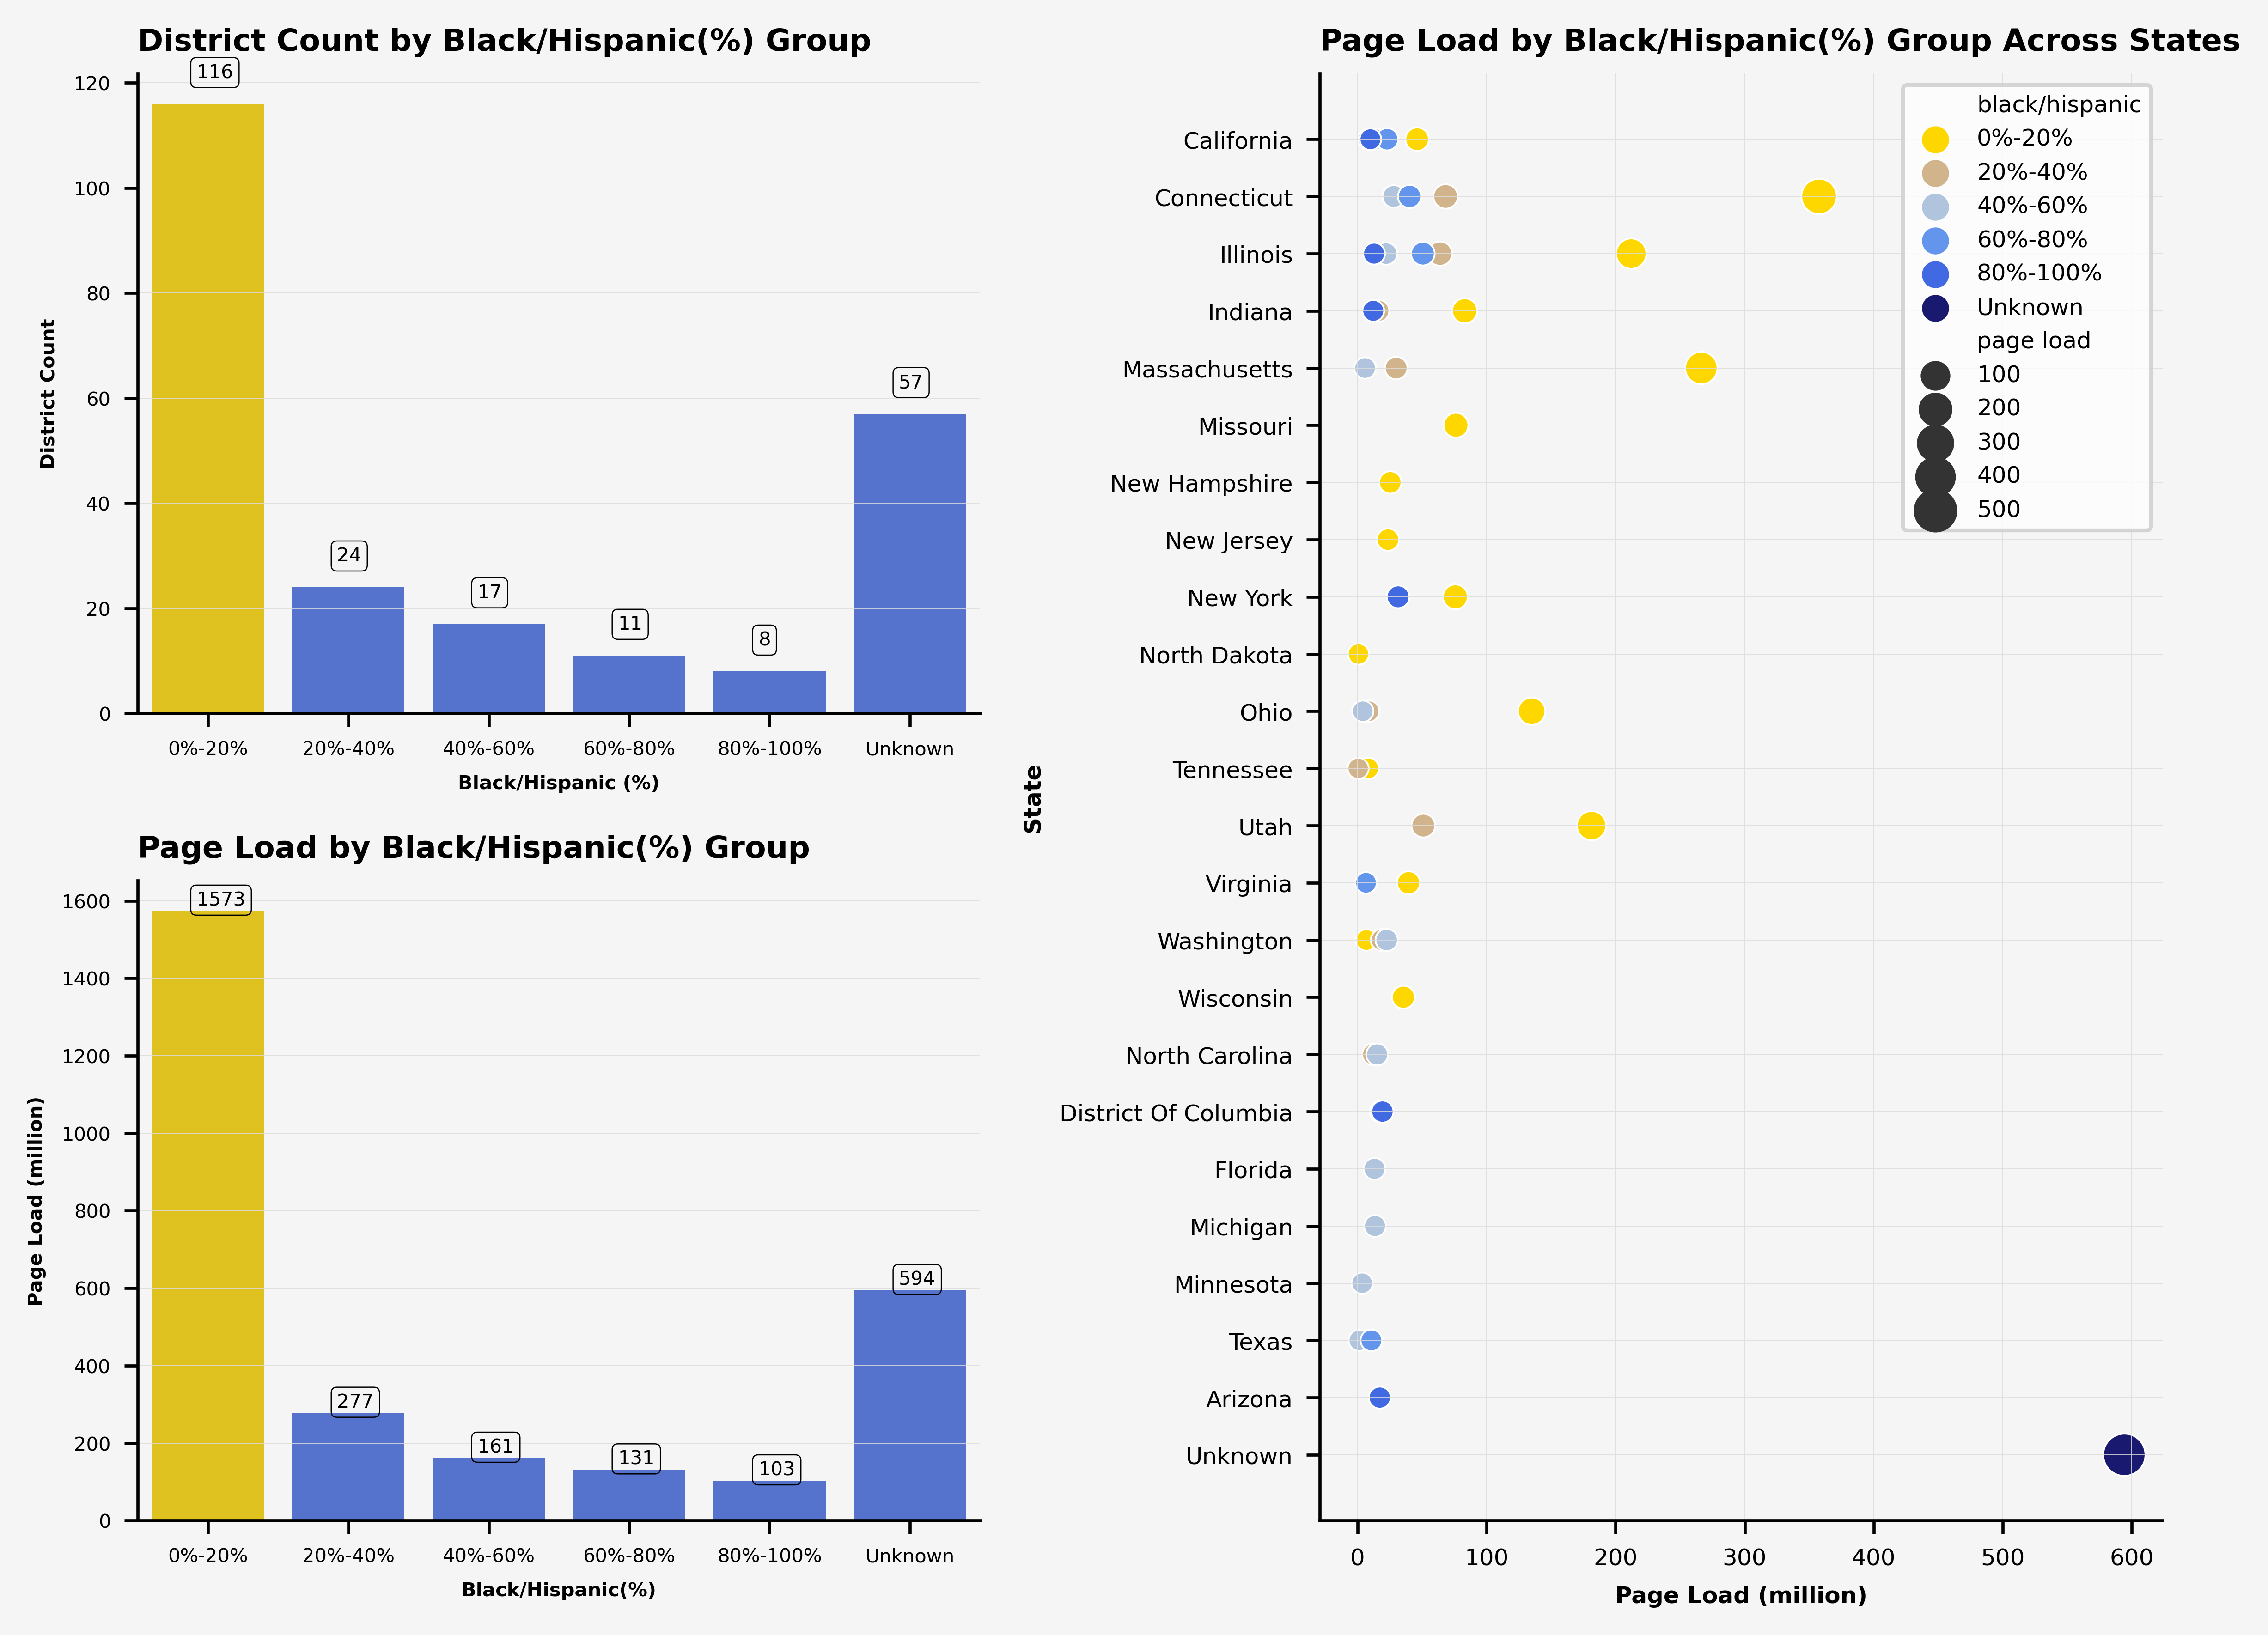

In [31]:
##### black/hispanic proportions #####
race= pd.DataFrame(data.groupby('pct_black/hispanic', dropna=False)['district_id'].nunique()).reset_index()
race.columns=['black/hispanic', 'district_count']
race= race.fillna('Unknown')
#plot graph
fig= plt.figure(figsize=(8,6), dpi=600, facecolor='whitesmoke')
gs= fig.add_gridspec(2,2)

color_map = ["royalblue" for _ in range(6)]
color_map[0] = "gold"
sns.set_palette(sns.color_palette(color_map))

ax1= fig.add_subplot(gs[0,0])
ax1.set_facecolor('whitesmoke')
sns.despine(top=True, right=True)
ax1= sns.barplot(x= 'black/hispanic', y='district_count', data= race)

#set title and axis
ax1.set_title('District Count by Black/Hispanic(%) Group', loc='left', fontsize=8, weight='bold')
ax1.set_xlabel('Black/Hispanic (%)', fontsize=5, fontweight='bold')
ax1.set_ylabel('District Count', fontsize=5, fontweight='bold')
ax1.tick_params(axis='both', which='major', labelsize=5)
ax1.grid(color='gainsboro', linewidth=0.2, which='major', axis='y')

for p in ax1.patches:
    value= round(p.get_height())
    x= p.get_x()+ p.get_width()/2.5
    y= p.get_y()+ p.get_height()+5
    ax1.text(x, y, value, fontsize=5, 
            bbox={'facecolor':'none', 'edgecolor':'black', 'boxstyle':'round', 'linewidth':0.3})

##### black/hispanic vs. page load #####
race_pageload= pd.DataFrame(data.groupby('pct_black/hispanic', dropna=False)['engagement_index'].sum()/1000000).reset_index()
race_pageload.columns= ['black/hispanic', 'page load']
race_pageload= race_pageload.fillna('Unknown')

#graph
color_map=['royalblue' for _ in range(6)]
color_map[0]= 'gold'
sns.set_palette(sns.color_palette(color_map))

ax2= fig.add_subplot(gs[1,0])
ax2.set_facecolor('whitesmoke')
sns.despine(top=True, right=True)
ax2= sns.barplot(x='black/hispanic', y='page load', data=race_pageload)

#set title and axis
ax2.set_title('Page Load by Black/Hispanic(%) Group', loc='left', fontsize=8, weight='bold')
ax2.set_xlabel('Black/Hispanic(%)', fontsize=5, fontweight='bold')
ax2.set_ylabel('Page Load (million)', fontsize=5, fontweight='bold')
ax2.tick_params(axis='both', which='major', labelsize=5)
ax2.grid(color='gainsboro', linewidth=0.2, which='major', axis='y')

for p in ax2.patches:
    value= round(p.get_height())
    x= p.get_x()+ p.get_width()/2.5
    y= p.get_y()+ p.get_height()+15
    ax2.text(x, y, value, fontsize=5, 
            bbox={'facecolor':'none', 'edgecolor':'black', 'boxstyle':'round', 'linewidth':0.3})
    
#####Black/hispanic by state
race_state= pd.DataFrame(data.groupby(['pct_black/hispanic', 'state'], dropna=False)['engagement_index'].sum()/1000000).reset_index()
race_state.columns= ['black/hispanic', 'state', 'page load']
race_state= race_state.fillna('Unknown')
#graph
ax3= fig.add_subplot(gs[:2,1])
ax3.set_facecolor('whitesmoke')
sns.despine(top=True, right=True)
ax3= sns.scatterplot(x='page load', y='state', hue='black/hispanic', size='page load', sizes=(30, 120),
                     data=race_state, palette= ['gold', 'tan', 'lightsteelblue', 'cornflowerblue', 'royalblue', 'midnightblue'])

#set title and axis
ax3.set_title('Page Load by Black/Hispanic(%) Group Across States', loc='left', fontsize=8, weight='bold')
ax3.set_xlabel('Page Load (million)', fontsize=6, fontweight='bold')
ax3.set_ylabel('State', fontsize=6, fontweight='bold')
ax3.tick_params(axis='both', which='major', labelsize=6)
ax3.grid(color='gainsboro', linewidth=0.2, which='major', axis='both')
ax3.legend(loc= 'upper right', prop={'size':6})

fig.tight_layout()



#### 2.5 Financial Status

#### Students Percentage with Lunch Subsidy 

#### Observations:

> Unfortunately, majority of the districts and page load counts do not have information on the student percentage with eligibility for free or reduced-price lunch.

> About 40% of districts have 0-40% of students eligible for free or reduced-price lunch, whereas only 4 districts have 80-100% of students eligible for free or reduced price lunch.

> 25% of page load was contributed by school district with 0-20% of students eligible for lunch subsidy, followed by 19% page load from district with 20-40% and 15% from districts with 40-60%.

> Excluding the missing values, states with more than 100 million page load comes from district with 0-20% and 20-40% of students eligible for free or reduced price lunch.

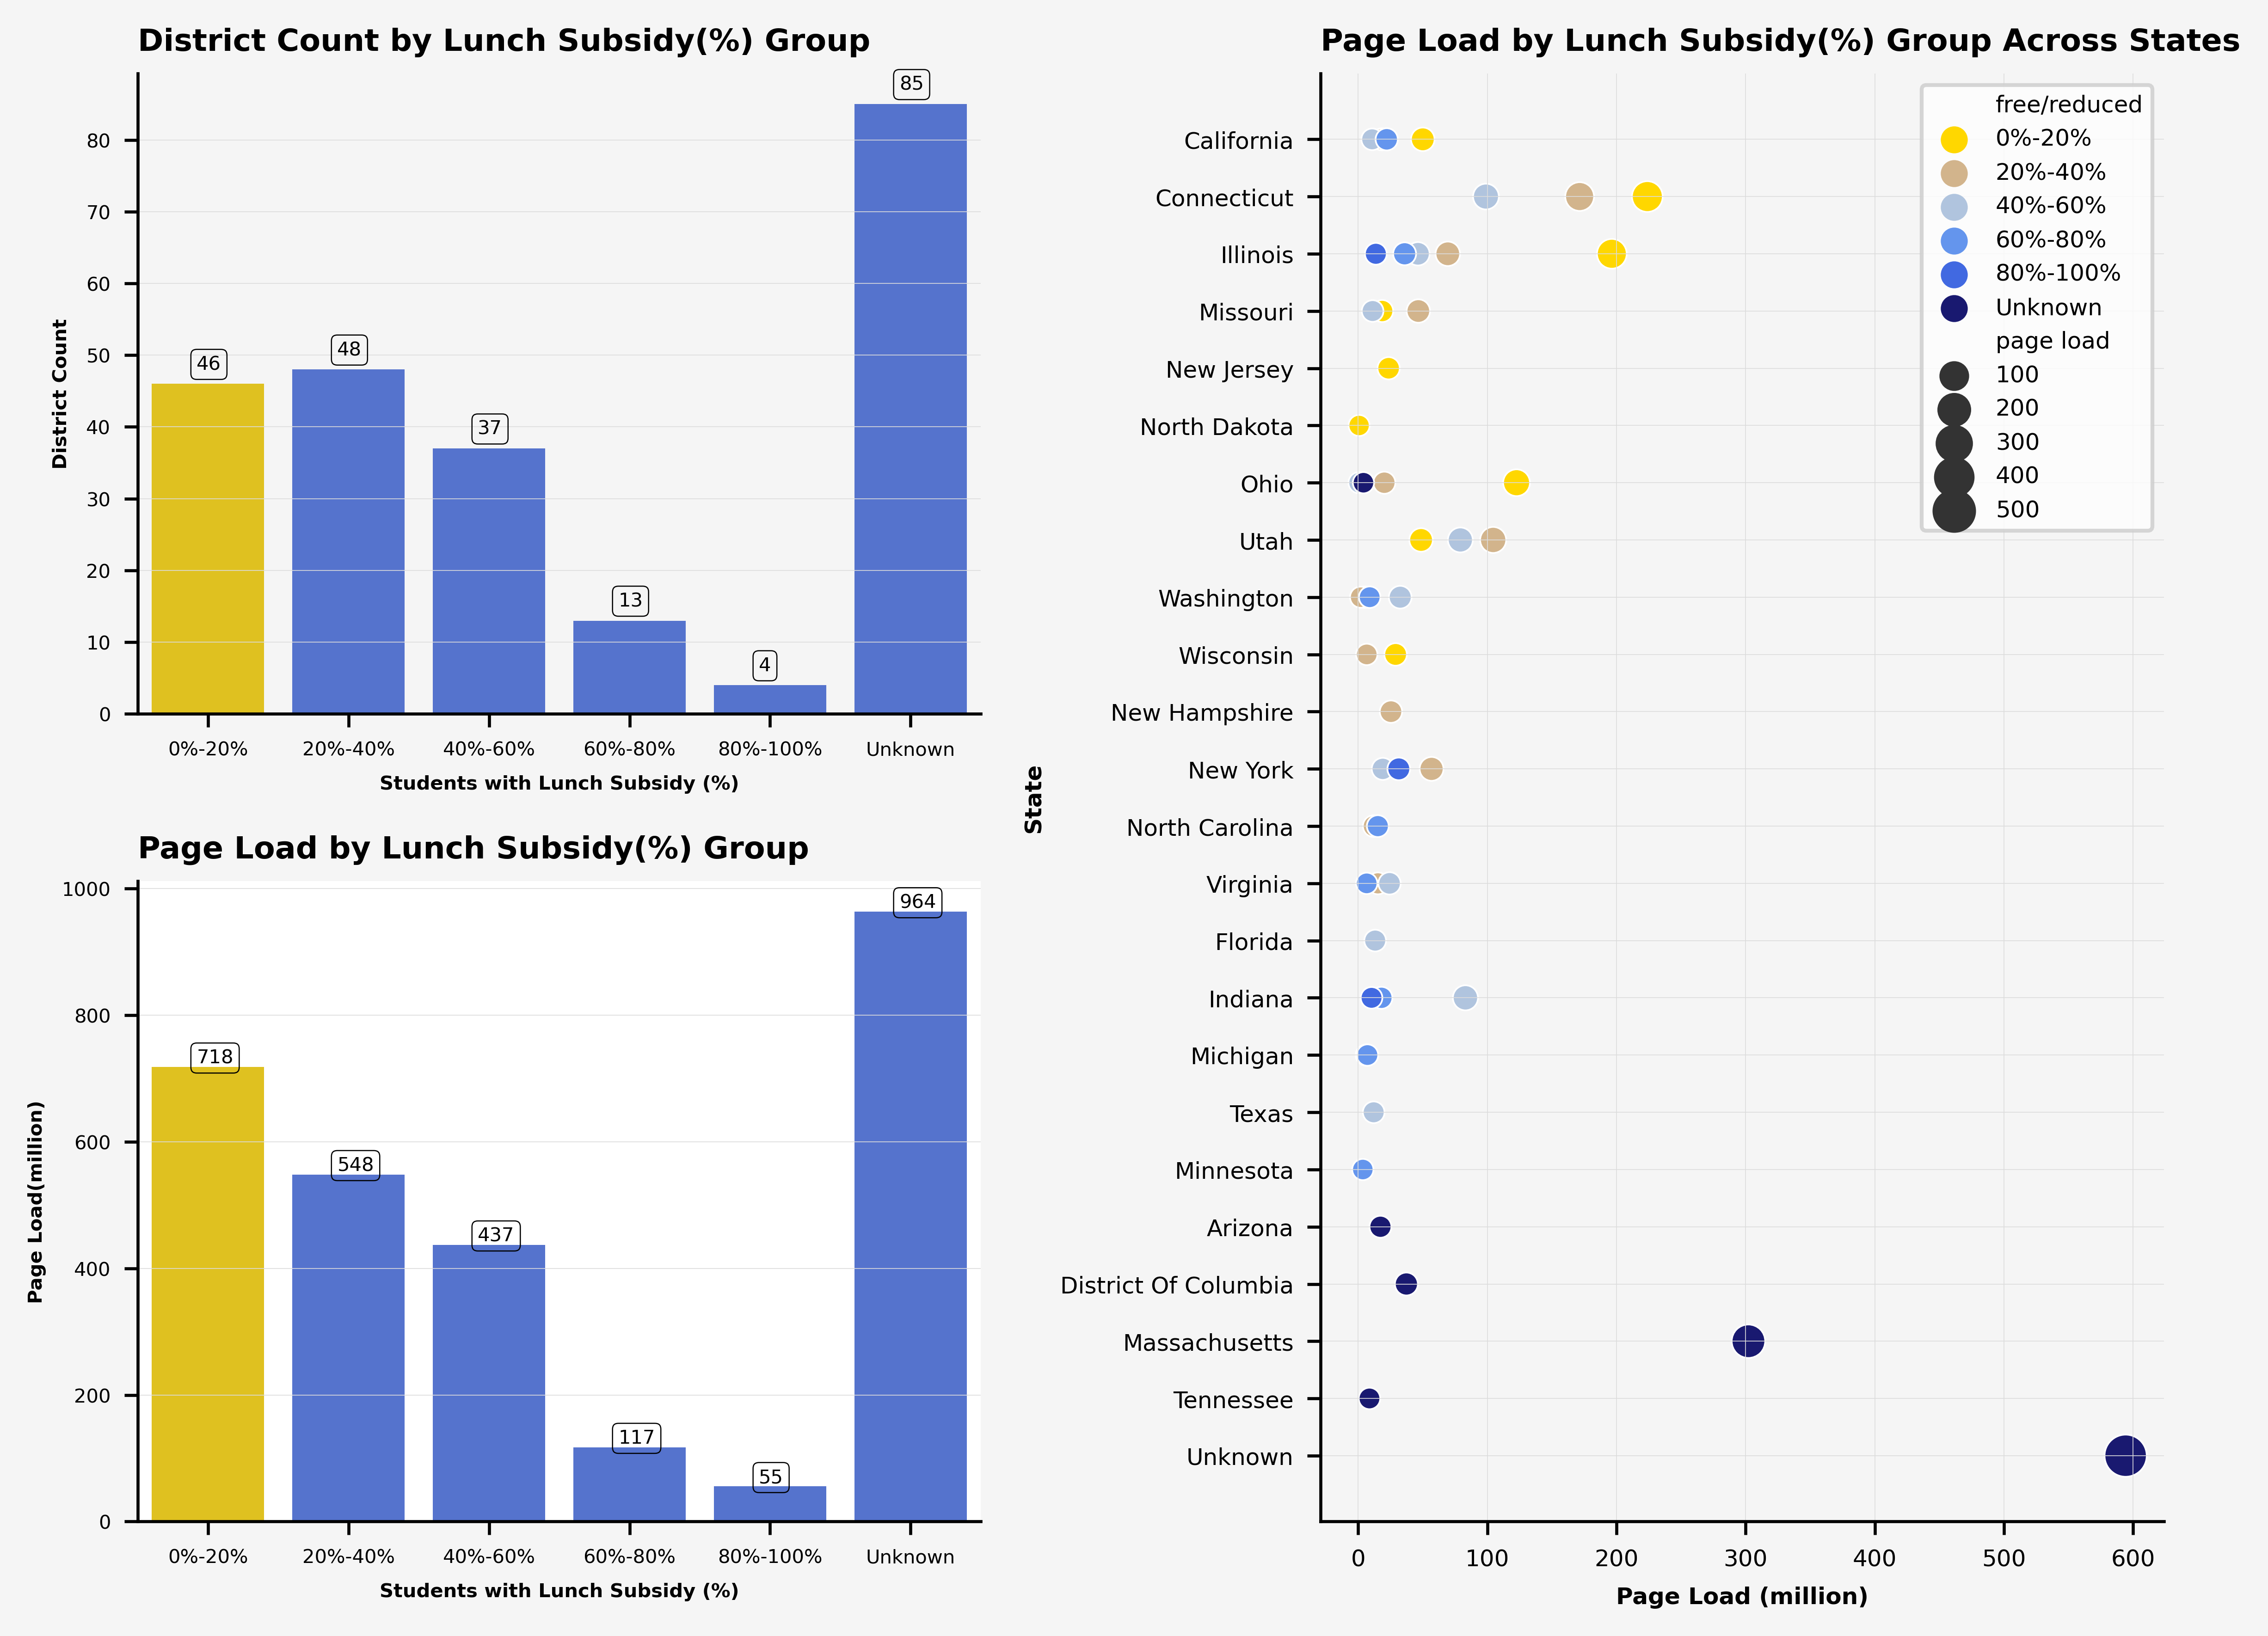

In [32]:
#### socioeconomic ####
lunchsub= pd.DataFrame(data.groupby('pct_free/reduced', dropna=False)['district_id'].nunique()).reset_index()
lunchsub.columns= ['free/reduced', 'district_count']
lunchsub= lunchsub.fillna('Unknown')
#graph
fig= plt.figure(figsize=(8,6), dpi=600, facecolor='whitesmoke')
gs= fig.add_gridspec(2,2)

color_map = ["royalblue" for _ in range(6)]
color_map[0] = "gold"
sns.set_palette(sns.color_palette(color_map))

ax1= fig.add_subplot(gs[0,0])
ax1.set_facecolor('whitesmoke')
sns.despine(top=True, right=True)
ax1= sns.barplot(x= 'free/reduced', y='district_count', data= lunchsub)

#set title and axis
ax1.set_title('District Count by Lunch Subsidy(%) Group', loc='left', fontsize=8, weight='bold')
ax1.set_xlabel('Students with Lunch Subsidy (%)', fontsize=5, fontweight='bold')
ax1.set_ylabel('District Count', fontsize=5, fontweight='bold')
ax1.tick_params(axis='both', which='major', labelsize=5)
ax1.grid(color='gainsboro', linewidth=0.2, which='major', axis='y')

for p in ax1.patches:
    value= round(p.get_height())
    x= p.get_x()+ p.get_width()/2.5
    y= p.get_y()+ p.get_height()+2
    ax1.text(x, y, value, fontsize=5, 
            bbox={'facecolor':'none', 'edgecolor':'black', 'boxstyle':'round', 'linewidth':0.3})
    

####Lunch Subsidy vs.Page Load
lunchsub_page= pd.DataFrame(data.groupby('pct_free/reduced', dropna=False)['engagement_index'].sum()/1000000).reset_index()
lunchsub_page.columns= ['free/reduced', 'page load']
lunchsub_page= lunchsub_page.fillna('Unknown')

color_map = ["royalblue" for _ in range(6)]
color_map[0] = "gold"
sns.set_palette(sns.color_palette(color_map))

ax2= fig.add_subplot(gs[1,0])
ax1.set_facecolor('whitesmoke')
sns.despine(top=True, right=True)
ax1= sns.barplot(x= 'free/reduced', y='page load', data= lunchsub_page)

#set title and axis
ax1.set_title('Page Load by Lunch Subsidy(%) Group', loc='left', fontsize=8, weight='bold')
ax1.set_xlabel('Students with Lunch Subsidy (%)', fontsize=5, fontweight='bold')
ax1.set_ylabel('Page Load(million)', fontsize=5, fontweight='bold')
ax1.tick_params(axis='both', which='major', labelsize=5)
ax1.grid(color='gainsboro', linewidth=0.2, which='major', axis='y')

for p in ax1.patches:
    value= round(p.get_height())
    x= p.get_x()+ p.get_width()/2.5
    y= p.get_y()+ p.get_height()+6
    ax1.text(x, y, value, fontsize=5, 
            bbox={'facecolor':'none', 'edgecolor':'black', 'boxstyle':'round', 'linewidth':0.3})
    
#### Lunch Subsidy vs. State ####
lunchsub_state= pd.DataFrame(data.groupby(['pct_free/reduced', 'state'], dropna=False)['engagement_index'].sum()/1000000).reset_index()
lunchsub_state.columns=['free/reduced', 'state', 'page load']
lunchsub_state= lunchsub_state.fillna('Unknown')
#graph
ax3= fig.add_subplot(gs[:2,1])
ax3.set_facecolor('whitesmoke')
sns.despine(top=True, right=True)
ax3= sns.scatterplot(x='page load', y='state', hue='free/reduced', size='page load', sizes=(30, 120),
                     data=lunchsub_state, palette= ['gold', 'tan', 'lightsteelblue', 'cornflowerblue','royalblue', 'midnightblue'])

#set title and axis
ax3.set_title('Page Load by Lunch Subsidy(%) Group Across States', loc='left', fontsize=8, weight='bold')
ax3.set_xlabel('Page Load (million)', fontsize=6, fontweight='bold')
ax3.set_ylabel('State', fontsize=6, fontweight='bold')
ax3.tick_params(axis='both', which='major', labelsize=6)
ax3.grid(color='gainsboro', linewidth=0.2, which='major', axis='both')
ax3.legend(loc= 'upper right', prop={'size':6})

fig.tight_layout()



#### Per-pupil Total Expenditure

> The expenditure data are school-by-school and the median value was used to represent the expenditure of a given school district.

> About 50% of the page load and district does not have per-pupil total expenditure information. 

> About 40% of page-load comes from group with USD 8000-18000 per-pupil total expenditure, whereas only 3% of page load comes from group with more than USD20000 per-pupil total expenditure.

> 44% of district have USD 6000-18000 per-pupil total expenditure, while only 5% of districts have more than USD18000 per-pupil total expenditure.

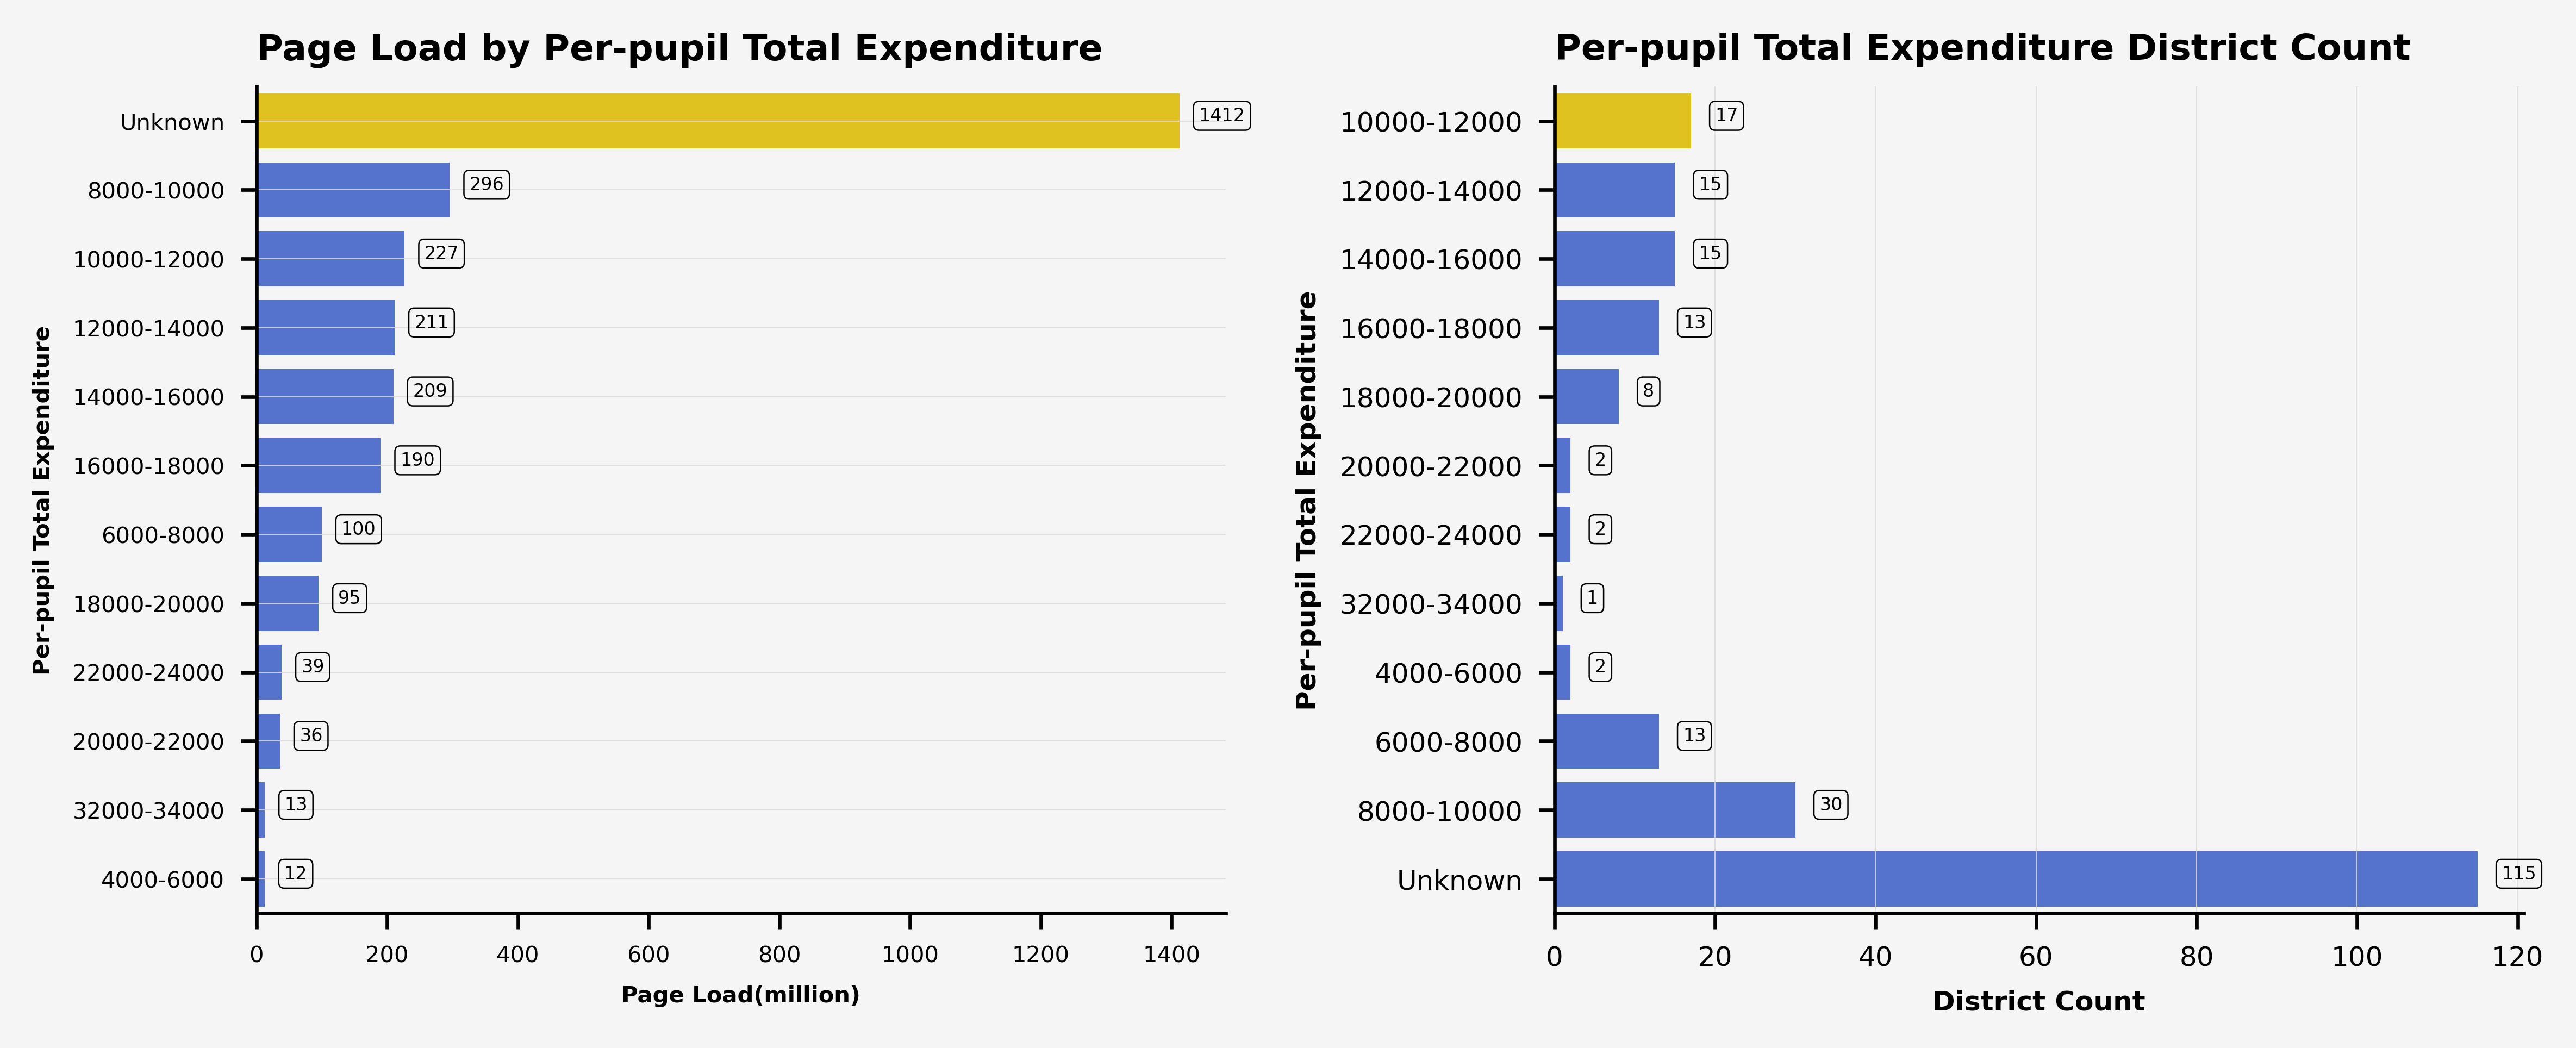

In [33]:
#### Per-pupil Total Expenditure ####
pp_exp= pd.DataFrame(data.groupby('pp_total_raw', dropna=False)['engagement_index'].sum()/1000000).reset_index()
pp_exp.columns= ['Total Expenditure', 'Page Load']
pp_exp= pp_exp.fillna('Unknown')
pp_exp= pp_exp.sort_values('Page Load', ascending=False)

#graph
fig= plt.figure(figsize=(8,6), dpi=600, facecolor='whitesmoke')
gs= fig.add_gridspec(2,2)

color_map = ["royalblue" for _ in range(20)]
color_map[0] = "gold"
sns.set_palette(sns.color_palette(color_map))

ax1= fig.add_subplot(gs[:1,0])
ax1.set_facecolor('whitesmoke')
sns.despine(top=True, right=True)
ax1= sns.barplot(x= 'Page Load', y='Total Expenditure', data= pp_exp, orient='h')

#set title and axis
ax1.set_title('Page Load by Per-pupil Total Expenditure', loc='left', fontsize=8, weight='bold')
ax1.set_ylabel('Per-pupil Total Expenditure', fontsize=5, fontweight='bold')
ax1.set_xlabel('Page Load(million)', fontsize=5, fontweight='bold')
ax1.tick_params(axis='both', which='major', labelsize=5)
ax1.grid(color='gainsboro', linewidth=0.2, which='major', axis='y')

for p in ax1.patches:
    value= round(p.get_width())
    x= p.get_x()+ p.get_width()+30
    y= p.get_y()+ p.get_height()/2
    ax1.text(x, y, value, fontsize=4, 
            bbox={'facecolor':'none', 'edgecolor':'black', 'boxstyle':'round', 'linewidth':0.3})


#### Expenditure by State ####
pp_exp= pd.DataFrame(data.groupby(['pp_total_raw'], dropna=False)['district_id'].nunique()).reset_index()
pp_exp.columns= ['total expenditure', 'district count']
pp_exp= pp_exp.fillna('Unknown')

ax2= fig.add_subplot(gs[:1,1])
ax2.set_facecolor('whitesmoke')
sns.despine(top=True, right=True)
ax2= sns.barplot(y='total expenditure', x='district count', data=pp_exp)

#set title and axis
ax2.set_title('Per-pupil Total Expenditure District Count', loc='left', fontsize=8, weight='bold')
ax2.set_ylabel('Per-pupil Total Expenditure', fontsize=6, fontweight='bold')
ax2.set_xlabel('District Count', fontsize=6, fontweight='bold')
ax2.tick_params(axis='both', which='major', labelsize=6)
ax2.grid(color='gainsboro', linewidth=0.2, which='major', axis='x')

for p in ax2.patches:
    value= round(p.get_width())
    x= p.get_x()+ p.get_width()+3
    y= p.get_y()+ p.get_height()/2
    ax2.text(x, y, value, fontsize=4, 
            bbox={'facecolor':'none', 'edgecolor':'black', 'boxstyle':'round', 'linewidth':0.3})

fig.tight_layout()



#### 2.6 CONNECTIONS

#### Observations:

> 30% of the districts have missing information on the county connections ratio.

> 69% of the districts have 18-100% of county connections ratio where only 1 district with 100-200% county connections ratio.

In [34]:
####Connections####
connections= pd.DataFrame(data.groupby('county_connections_ratio', dropna=False)['district_id'].nunique()).reset_index()
connections.columns= ['County Connetions Ratio', 'District Count']
connections= connections.fillna('Unknown')  
connections


County Connetions Ratio  District Count
0               100%-200%               1
1                18%-100%             161
2                 Unknown              71

### Conclusion:

The following main questions were analyzed:
Does COVID-19 have an impact on student learning? What was the state of digital learning in 2020 and how engagement with digital learning relates to factors like district demographics, broadband access, and socioeconomic status?

Before the outbreak of COVID-19, students seem to have been using online learning technology but the COVID-19 pandemic did increase the usage frequency of these products. Google is at the first place in providing various products to satisfy the need of students. School districts with low percentage (0-20%) of black/hispanic tend to access digital learning products more. However, due to the amount of missing values, it is hard to conclude if students percentage with lunch subsidy and per-pupil total expenditure have any influence on the engagement index.

More information should be collected for further analysis especially on variables related to socioeconomic of each school district.